In [1]:
#pulling in data
import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as arr
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from datetime import datetime
import glob
import os

# read by default 1st sheet of an excel file
dataframes = pd.read_excel(
    "../data/validation_data/all_validation_data.xlsx",
    sheet_name=None,
)



# Get a list of all the csv files in the target directory
stats_files = glob.glob('../data/output/statistics/*.csv')


flow_files = glob.glob('../data/output/flows/*.csv')
print(flow_files)
print(flow_files[0])
# Read and combine all the csv files into a single dataframe
# ex flow file
# data/output/flows/Secrest32-14_000000_flows_0.1666_flows.csv
# ex stats file
# data/output/statistics/Secrest32-06_000000_1_-0.8_statistics.csv
# data/output/statistics/Secrest32-06_000000_-0.8_statistics.csv




#Throws alot of warnings since the last column, time stamp gets dropped off since it doesnt have a col name
def get_file_name_attrs(file_list,remove_zeros, flows):
    file_names = [(f,os.path.basename(f).replace('_1_','').replace(
            'Secrest07-32_000000_Secrest07-32_000000','Secrest07-32_000000').replace(
            'Secrest08-24c_000000_Secrest08-24c_000000','Secrest08-24c_000000').replace(
            'Secrest10-02_000000_Secrest10-02_000000','Secrest10-02_000000')) for f in file_list]
    to_remove_from_name = ['_flows','_statistics','.csv','_flows']
    for rem_string in to_remove_from_name:
        file_names = [(x,y.replace(rem_string,'')) for x,y in file_names]
    flow_cols = ["num_cylinders","projected_area","surface_area","angle_sum","volume","sa_to_vol","drip_node_id","drip_node_loc",'timestamp']
    stats_cols = ["total_psa","psa_w_overlap","stem_psa","stem_psa_w_overlap","tot_surface_area","stem_surface_area","tot_hull_area","tot_hull_boundary","stem_hull_area","stem_hull_boundary","num_drip_points","max_bo","topQuarterTotPsa","topHalfTotPsa","topThreeQuarterTotPsa","TotalShade","top_quarter_shade","top_half_shade","top_three_quarter_shade","DBH","volume","X_max","Y_max","Z_max","X_min","Y_min","Z_min","Order_zero_angle_avg","Order_zero_angle_std","Order_one_angle_avg","Order_one_angle_std","Order_two_angle_avg","Order_two_angle_std","Order_three_angle_avg","Order_three_angle_std","order_gr_four_angle_avg","order_gr_four_angle_std","file_name","timestamp"]
    if remove_zeros: 
        if flows:
            name_parts = [(name.split('_000000_')[0], name.split('_000000_')[1], pd.read_csv(f,index_col=False,names=flow_cols,skiprows=1 )) for f, name in file_names if '_000000_' in name]
        else:
            name_parts = [(name.split('_000000_')[0], name.split('_000000_')[1], pd.read_csv(f,index_col=False,names=stats_cols,skiprows=1  )) for f, name in file_names if '_000000_' in name]
    else:
        if flows:
            name_parts = [(name.split('_000000_')[0] + '_000000', name.split('_000000_')[1], pd.read_csv(f,index_col=False,names=flow_cols,skiprows=1)) for f, name in file_names if '_000000_' in name]
        else:
            name_parts = [(name.split('_000000_')[0] + '_000000', name.split('_000000_')[1], pd.read_csv(f,index_col=False,names=stats_cols,skiprows=1)) for f, name in file_names if '_000000_' in name]

    # print(name_parts)
    return name_parts

# get_file_name_attrs()

# Read each
all_tree_stats = pd.DataFrame()
print(all_tree_stats.size)
dfs_and_cases = get_file_name_attrs(stats_files, remove_zeros = False, flows = False)
print(len(dfs_and_cases))

file_names = []
dfs=[]
for idx, tup in enumerate(dfs_and_cases):
    file_name, case_name, df = tup
    df['file_name'] = file_name
    df['case_name'] = case_name
    df['join_field']=f'{file_name},{str(case_name)}'
    file_names.append(file_name)
    dfs.append(df)
print(len(dfs))
print(dfs[0])
all_tree_stats = pd.concat(dfs)

# print(all_tree_stats.size)
# if debug: if debug: if debug: if debug: print(len(all_tree_stats['file_name']))
# print(len(dfs_and_cases))

flow_dfs_and_cases = get_file_name_attrs(flow_files, remove_zeros = False, flows = True)
flow_dfs = []

for idx, tup in enumerate(flow_dfs_and_cases):
    # print(tup)
    file_name, case_name, df = tup
    df['file_name'] = file_name
    df['case_name'] = case_name
    df['join_field'] = f'{file_name},{str(case_name)}'
    is_stem = [cyl_id==0 for cyl_id in df['drip_node_id']]
    df['is_stem'] = is_stem
    flow_dfs.append(df)


all_tree_flows = pd.concat(flow_dfs)

#getting cases that we have already run a sensitivity analysis on
arr = [x for x in all_tree_stats[['file_name', 'case_name']].values]


print(f'run_cases:{[(x,y) for x,y in arr ]}')

test_read= pd.read_csv('../data/output/aggregated/flow_stats.csv')
# w_flow_stats.to_csv('../data/output/aggregated/flow_stats.csv')



/tmp/ipykernel_103761/4247888590.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


['../data/output/flows/Secrest18-13_000000_flows_-0.95_flows.csv', '../data/output/flows/Secrest29-20_000000_flows_1.5_flows.csv', '../data/output/flows/Secrest26-03_000000_flows_-0.96_flows.csv', '../data/output/flows/Secrest32-06_000000_flows_0.6_flows.csv', '../data/output/flows/Secrest27-05_000000_flows_0.5_flows.csv', '../data/output/flows/Secrest11-27_000000_flows_-1.5_flows.csv', '../data/output/flows/Secrest27-05_000000_flows_-0.04_flows.csv', '../data/output/flows/Secrest32-03_000000_flows_0.64_flows.csv', '../data/output/flows/Secrest08-24c_000000_flows_Secrest08-24c_000000_-0.48_flows.csv', '../data/output/flows/Secrest03-12_000000_flows_-0.4_flows.csv', '../data/output/flows/Secrest32-03_000000_flows_-1.5_flows.csv', '../data/output/flows/Secrest32-03_000000_flows_0.8_flows.csv', '../data/output/flows/Secrest11-27_000000_flows_-0.9_flows.csv', '../data/output/flows/Secrest29-25_000000_flows_1.26_flows.csv', '../data/output/flows/Secrest31-05_000000_flows_1.42_flows.csv', '.

In [3]:
#Sensitivity - creating summary (/vol) fields 

def retain_quantile(df, field, percentile):
    percentile_val = df[field].quantile(percentile)
    # print(f'percentile_val = {percentile_val} found for {field}, percentile {percentile}')
    return df[df[field] >= percentile_val]

def return_quantile(df, field, percentile):
    percentile_val = df[field].quantile(percentile)
    # print(f'percentile_val = {percentile_val} found for {field}, percentile {percentile}')
    return df[df[field] >= percentile_val][field]


all_tree_stats_raw = all_tree_stats
# all_tree_stats_raw['vol_over_tps'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['total_psa'])
# all_tree_stats_raw['vol_over_sps'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['stem_psa'])    
# all_tree_stats_raw['vol_over_tsa'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['tot_surface_area'])   
# all_tree_stats_raw['vol_over_ssa'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['stem_surface_area'])
# all_tree_stats_raw['vol_over_tha'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['tot_hull_area'])
# all_tree_stats_raw['vol_over_sha'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['stem_hull_area'])
# all_tree_stats_raw['vol_over_dbh'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['DBH'])
# all_tree_stats_raw['vol_over_oza'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['Order_zero_angle_avg'])
# all_tree_stats_raw['vol_over_ota'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['Order_two_angle_avg'])



all_tree_stats['tree_codes']=all_tree_stats.apply(lambda row: row['file_name'].replace('Secrest','').split('_')[0],  axis = 1)


all_tree_stats = all_tree_stats.dropna(axis=1, how='all')
all_tree_stats = all_tree_stats.sort_values(by=['file_name', 'case_name'])
#        'Order_three_angle_std', 'order_gr_four_angle_avg',
#        'order_gr_four_angle_std', 'file_name', 'case_name']
all_tree_flows = all_tree_flows.sort_values(by=['file_name', 'case_name'])

stem_flows = all_tree_flows[all_tree_flows['is_stem']]
drip_flows = all_tree_flows[all_tree_flows['is_stem']==False]
drip_flows = drip_flows[drip_flows['projected_area']>0.001]

drip_grouped = drip_flows.groupby(['file_name','case_name'])
drip_stats = [{'join_field': f'{group[0][0]},{str(group[0][1])}',
                'drip_avg_num_cyls': np.mean(group[1]['num_cylinders']), 
                'drip_max_num_cyls': np.max(group[1]['num_cylinders']), 
                # 'dp_95_prct': group[1]['projected_area'].quantile(0.95),
                # 'dp_count_95' : len((return_quantile(group[1],'projected_area',0.95))),
                # 'dp_max_pa_95' : np.max(return_quantile(group[1],'projected_area',0.95)),
                # 'dp_pa_95'     : np.sum(return_quantile(group[1],'projected_area',0.95)),
                # 'dp_avg_pa_95' : np.mean(return_quantile(group[1],'projected_area',0.95)),
                # 'dp_sa_95'     : np.sum(return_quantile(group[1],'surface_area',0.95)),
                # 'dp_vol_95'     : np.sum(return_quantile(group[1],'volume',0.95)),
                # 'dp_ratio_95'     : np.sum(return_quantile(group[1],'sa_to_vol',0.95)),
                
                'dp_prct': group[1]['projected_area'].quantile(0.98),
                'dp_count' : len((return_quantile(group[1],'projected_area',0.98))),
                'dp_max_pa' : np.max(return_quantile(group[1],'projected_area',0.98)),
                'dp_pa'     : np.sum(return_quantile(group[1],'projected_area',0.98)),
                'dp_avg_pa' : np.mean(return_quantile(group[1],'projected_area',0.98)),
                'dp_sa'     : np.sum(return_quantile(group[1],'surface_area',0.98)),
                'dp_vol'     : np.sum(return_quantile(group[1],'volume',0.98)),
                'dp_sum_sa_to_vol'     : np.sum(return_quantile(group[1],'sa_to_vol',0.98)),
                'dp_avg_sa_to_vol'     : np.mean(return_quantile(group[1],'sa_to_vol',0.98)),
                'dp_agg_sa_to_vol': np.sum(return_quantile(group[1],'surface_area',0.98))/np.sum(return_quantile(group[1],'volume',0.98)),

                'dn_count' : len(group[1]['projected_area']),
                'dn_max_pa': np.max(group[1]['projected_area']),
                'dn_pa': np.sum(group[1]['projected_area']),
                'dn_avg_pa': np.mean(group[1]['projected_area']),
                'dn_avg_sa'     : np.sum(return_quantile(group[1],'surface_area',0.98))
                }   for group in drip_grouped] 

stem_grouped = stem_flows.groupby(['file_name','case_name'])
stem_stats = [
                { 
                    'join_field':  f'{group[0][0]},{str(group[0][1])}',
                    'stem_avg_num_cyls' :np.mean(group[1]['num_cylinders']), 
                    'stem_pa' :np.sum(group[1]['projected_area']), 
                    'stem_vol' :np.sum(group[1]['volume']),
                    'stem_sa' :np.sum(group[1]['surface_area']),
                    'stem_avg_sa_vol' :np.mean(group[1]['sa_to_vol'])
                } for group in stem_grouped]



drip_df = pd.DataFrame(drip_stats)
stem_df = pd.DataFrame(stem_stats)
stem_df['stem_agg_sa_to_vol'] = stem_df['stem_sa']/stem_df['stem_vol']


# w_flow_stats = all_tree_stats.join(drip_df, how='left', on= 'join_field', lsuffix='stats',rsuffix='drip')
w_drip_stats = all_tree_stats.set_index('join_field').join(drip_df.set_index('join_field'))
w_flow_stats = w_drip_stats.join(stem_df.set_index('join_field'))


all_tree_stats['case_name'] = pd.to_numeric(all_tree_stats['case_name'], errors='coerce')
w_flow_stats['case_name'] = pd.to_numeric(w_flow_stats['case_name'], errors='coerce')

# print(all_tree_stats['join_field'])
# Sort the dataframe by 'case_name'
all_tree_stats = all_tree_stats.sort_values(by='case_name')
w_flow_stats = w_flow_stats.sort_values(by='case_name')

w_flow_stats = w_flow_stats.dropna(axis=1, how='all')

w_flow_stats['stem_over_dn_pa'] = w_flow_stats['stem_psa']/w_flow_stats['dn_pa']
w_flow_stats['stem_over_dp_pa'] = w_flow_stats['stem_psa']/w_flow_stats['dp_pa']

w_flow_stats['stem_over_else'] = w_flow_stats['stem_psa']/(w_flow_stats['total_psa'] - w_flow_stats['stem_psa'])


w_flow_stats = w_flow_stats.dropna(axis=1, how='all')


In [101]:
start_dates = dataframes['hg_event_summaries'][['start_datetime','Event']]
end_dates = dataframes['hg_event_summaries'][['end_datetime', 'Event']]
start_end_tuples = start_dates.set_index('Event').join(end_dates.set_index('Event'), on='Event',rsuffix='_')
# event_dict = {tup['Event']: for tup in start_end_tuples}
def get_event(rain_measurement):
    event_id =None
    for event, dates in start_end_tuples.iterrows():
        print(f'Event: {event} Start: {dates["start_datetime"]} End: {dates["end_datetime"]}')
        if rain_measurement >= dates['start_datetime'] and rain_measurement <= dates['end_datetime']:
            if event_id:
                print(f'Error: {rain_measurement["TIMESTAMP"]} is in multiple events')
                raise Exception
            else:
                event_id = event
    return event_id
            


    # return start_end_tuples.loc[event_name]['start_datetime'], start_end_tuples.loc[event_name]['end_datetime']
# start_dates["Event"]
# end_dates

# hydro_met_data_agg

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


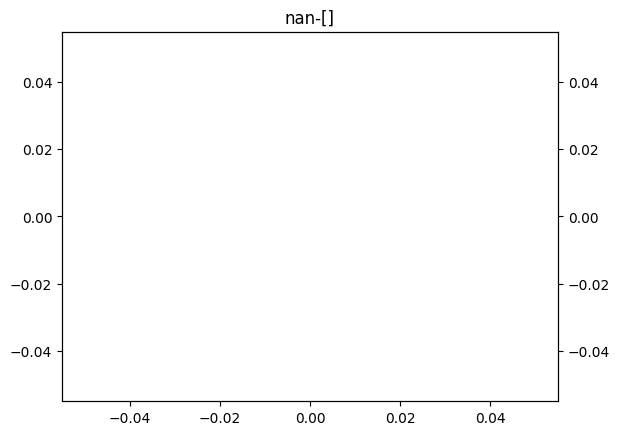

1126.0
130.4
617.0
93.1
18.6
261.1
1126.0
0.0
861.6
335.8
1126.0
335.8


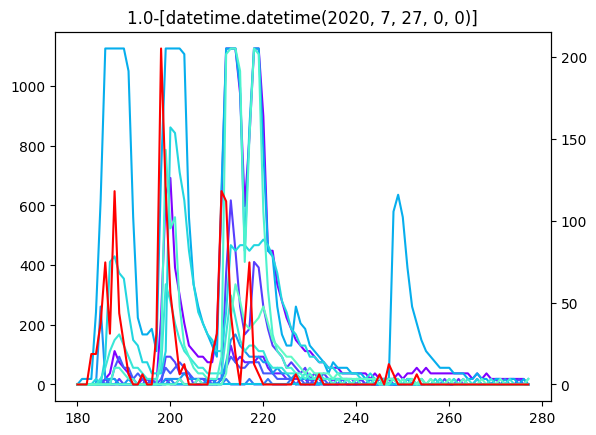

1126.0
373.2
504.4
74.5
18.6
186.4
1126.0
617.0
899.3
392.0
1126.0
167.7


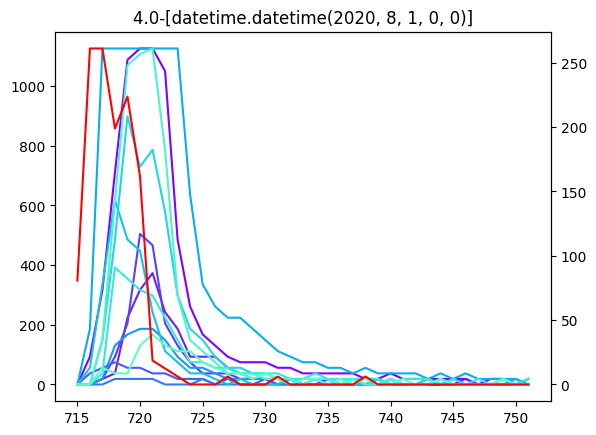

1126.0
279.7
410.7
130.4
149.0
18.6
1126.0
373.2
1107.1
74.5
1126.0
261.1


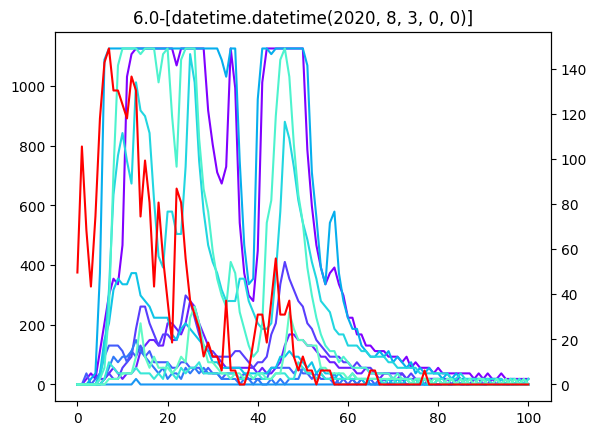

1126.0
711.0
1069.2
55.9
74.5
0.0
1126.0
149.0
1126.0
37.2
635.8
617.0


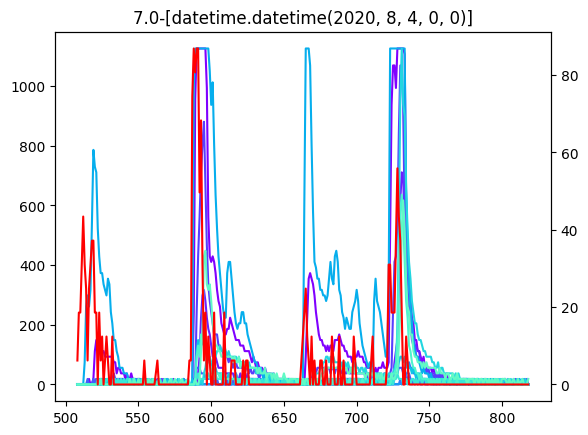

1126.0
74.5
205.0
37.2
18.6
93.1
1126.0
279.7
317.1
18.6
373.2
335.8


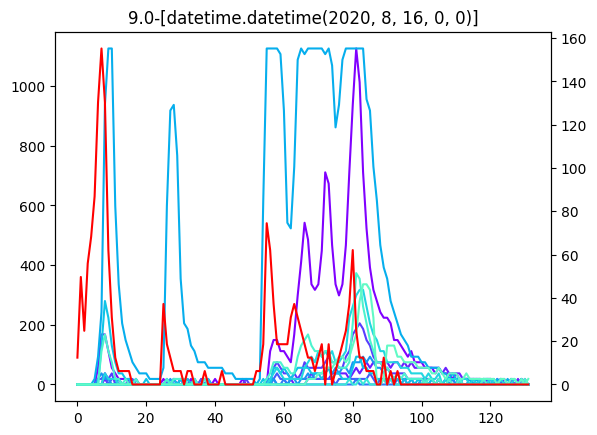

205.0
18.6
223.7
37.2
18.6
55.9
1126.0
373.2
130.4
317.1
335.8
37.2


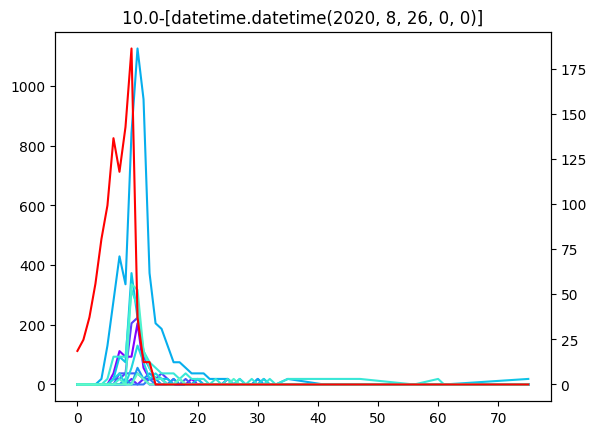

1126.0
93.1
937.0
74.5
55.9
93.1
1126.0
673.3
373.2
410.7
1126.0
354.5


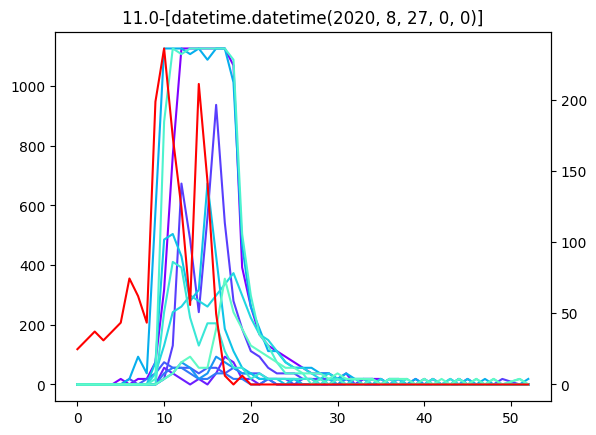

1126.0
1126.0
1126.0
167.7
673.3
1126.0
1126.0
1126.0
354.5
1126.0
1126.0
842.7


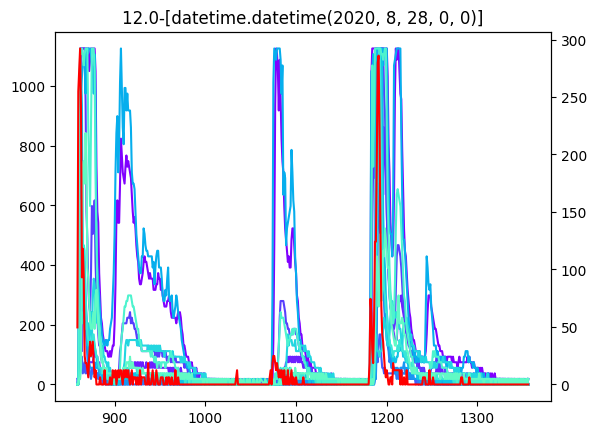

1126.0
1126.0
1126.0
93.1
354.5
767.4
1126.0
1126.0
1012.5
654.6
1126.0
1126.0


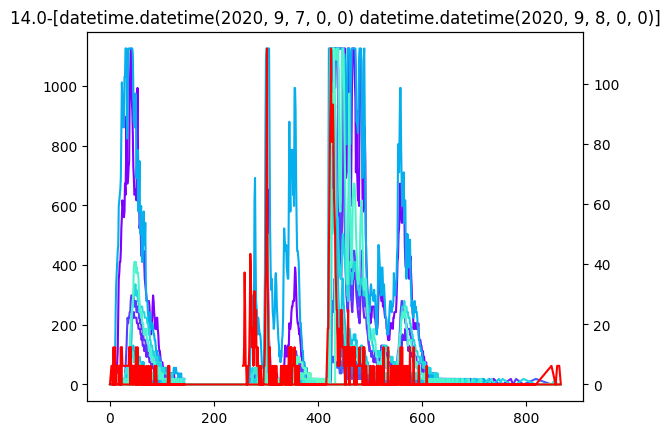

1126.0
748.6
635.8
93.1
149.0
93.1
1126.0
335.8
0.0
223.7
1126.0
0.0


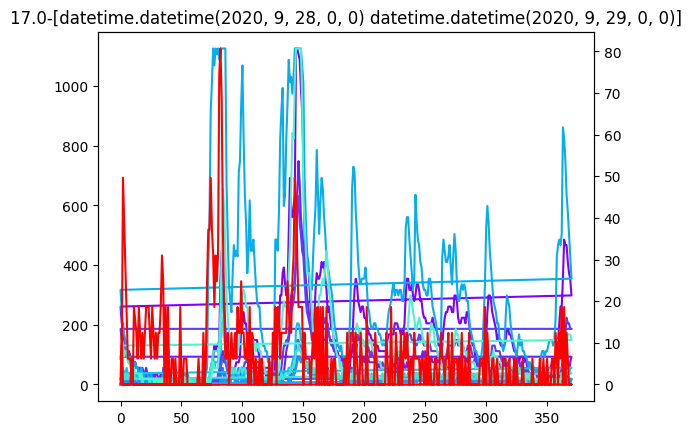

In [127]:
#Preping Hydromet data 
import datetime
from datetime import time 
import matplotlib.cm as cm
# hydro_met_data_with_seperators = dataframes['hydromet']

# #IDing needed cols
# sub_categories = ['N','SE','SW','C']
# needed_columns = [x for x in hydro_met_data_with_seperators.columns if not any([sub in x for sub in sub_categories])]
# rain_columns = ['Rain','10-08','16-14','18-13','02-26','24-7','26-3','27-5','04-12','32-1','32-6','32-07','T1']

# # Finding start/end time, duration
# hydro_met_data_with_seperators['is_date'] = hydro_met_data_with_seperators['Date'].map(lambda x: isinstance(x, datetime.datetime))
# hydro_met_data = hydro_met_data_with_seperators[hydro_met_data_with_seperators['is_date']][needed_columns]

# date_groupings = hydro_met_data.groupby('Date')
# date_group_indexes = date_groupings['TIMESTAMP'].transform('min')
# sum_group_indexes = date_groupings[rain_columns].transform('sum')
# cumsum_group_indexes = date_groupings[rain_columns].cumsum()
# hydro_met_data = hydro_met_data.join(date_group_indexes, rsuffix = '_min')
# hydro_met_data = hydro_met_data.join(cumsum_group_indexes, rsuffix = '_cum')
# hydro_met_data_agg= hydro_met_data.join(sum_group_indexes, rsuffix = '_sum')

# time_start_to_curr= hydro_met_data_agg['TIMESTAMP'] - hydro_met_data_agg['TIMESTAMP_min']
# hydro_met_data_agg['sec_since_start']=time_start_to_curr.apply(lambda x: x.total_seconds())

# hydro_met_data_agg
# dataframes['hg_event_summaries']

# hydro_met_data_agg['event_id'] = hydro_met_data_agg['TIMESTAMP'].apply(get_event)
# hydro_met_data_agg[hydro_met_data_agg['event_id'].isna()]


# date_groupings = hydro_met_data_agg.groupby('event_id')
# date_group_indexes = date_groupings[rain_columns].agg('sum')
# print(date_group_indexes)

# rain_data_by_tree = hydro_met_data[needed_columns]
# event_dates = hydro_met_data_agg['Date'].unique()
# event_ids = hydro_met_data_agg['event_id'].unique()
# rain_data_by_tree['bin'] = 
def plot_rain_events(bin=10):
    # for idx, date in enumerate(event_dates):
    for event_id in event_ids:
        fig, ax = plt.subplots()
        # event = hydro_met_data_agg[hydro_met_data_agg['Date'] ==date].copy()
        event = hydro_met_data_agg[hydro_met_data_agg['event_id'] ==event_id].copy()
        date = event['Date'].unique()
        # event  = event[~event['event_id'].isna()]
        # periods_of_significant_rain = retain_quantile(event, 'Rain_sum', .25)
        # event[event['Rain']>]
        colors = iter(cm.rainbow(np.linspace(0, 1, len(rain_columns)*2)))
        x_base = event
        tree_cols = [col for col in rain_columns if not col=='Rain']
        ys = []
        ax1 = ax.twinx()
        for column in tree_cols:
            print(event[column].max())
            # for idy, ver in enumerate([column, column +'_cum']):
            color = next(colors)
            # print(color)
            cut = (event[column]>0)
            y = event[column]
            x = x_base['sec_since_start']/60
            # print(column)
            # ax[idy].set_title(f'{ver} {date}')
            # ax[idy].plot(x,y,c=color, label= ver )
            ax.set_title(f'{event_id}-{date}')
            ax.plot(x,y,c=color, label= column ) 
        ax1.plot (x,event['Rain'], c = 'red')      
            # ax[0].legend()
            # ax[1].legend()
        plt.show()

plot_rain_events(1)


#data to fix
#9-29 has a outlier on right 
# 8-01 on the left

#data to investigate
# Some dates jave multiple events 
#    This would be good for comparing saturated flow with non-saturated flow 
#       9/8, 9/7, 8/28 

In [208]:
# validation data set up - defining the validation ration fields
# tree_name = 'A. platanoides'
# Read datasets (excel sheets) into dataframes
rain_data = hydro_met_data_agg
volume          = dataframes["Volume"]
depth            = dataframes["Depth"]
tree_traits = w_flow_stats
tree_mappings = dataframes["Mapping"]

# Set indexes to easily access rows/join data sets
# tree_traits.set_index("tree_codes", inplace=True)
# tree_mappings.set_index("Code", inplace=True)
# depth.set_index("Date", inplace=True)
# volume.set_index("Date", inplace=True)
# rain_data.set_index("Date", inplace=True)

#Dates were added to the data log in diff formats 
#this dict is intended to fix that
date_fix_dict = {
    datetime.datetime(2020, 1, 8): datetime.datetime(2020, 8, 1),
    datetime.datetime(2020, 3, 8): datetime.datetime(2020, 8, 3),
    datetime.datetime(2020, 4, 8): datetime.datetime(2020, 8, 4),
    datetime.datetime(2020, 5, 8): datetime.datetime(2020, 8, 5),
    datetime.datetime(2020, 6, 8): datetime.datetime(2020, 9, 6),
    datetime.datetime(2020, 7, 9): datetime.datetime(2020, 9, 7),
    datetime.datetime(2022, 1, 8): datetime.datetime(2020, 8, 1),
    datetime.datetime(2022, 3, 8): datetime.datetime(2020, 8, 3),
    datetime.datetime(2022, 4, 8): datetime.datetime(2020, 8, 4),
    datetime.datetime(2022, 5, 8): datetime.datetime(2020, 8, 5),
    datetime.datetime(2022, 6, 8): datetime.datetime(2020, 9, 6),
    datetime.datetime(2022, 7, 9): datetime.datetime(2020, 9, 7),
    datetime.datetime(2020, 1, 10):datetime.datetime(2020, 10, 1),
    datetime.datetime(2020, 4, 10):datetime.datetime(2020, 10, 4),
    datetime.datetime(2022, 2, 8): datetime.datetime(2022, 8, 2),
    datetime.datetime(2022, 11, 8):datetime.datetime(2022, 8, 11),
    datetime.datetime(2022, 9, 10):datetime.datetime(2022, 9, 10),
    datetime.datetime(2022, 2,11): datetime.datetime(2022, 11, 2),
    datetime.datetime(2022, 1, 10):datetime.datetime(2020, 10, 1),
    datetime.datetime(2022, 4, 10):datetime.datetime(2020, 10, 4),
    datetime.datetime(2020, 2, 8): datetime.datetime(2022, 8, 2),
    datetime.datetime(2020, 11, 8):datetime.datetime(2022, 8, 11),
    datetime.datetime(2020, 9, 10):datetime.datetime(2022, 9, 10),
    datetime.datetime(2020, 2,11): datetime.datetime(2022, 11, 2),
}

print(date_fix_dict.get("2020-01-08"))
# date_fix_dict = {v:k for k,v in date_fix_dict.items()}
# print(date_fix_dict)
# print(date_fix_dict.get('2020-01-08'))

volume.index = volume.index.map(lambda x: date_fix_dict.get(x, x))

depth.index = depth.index.map(lambda x: date_fix_dict.get(x, x))


volume_w_intensity = volume.join(rain_data, how='left',on='Date')
depth_w_intensity = depth.join(rain_data, how='left',on='Date')
volume_w_intensity['Duration']  =volume_w_intensity['StartTime'] - volume_w_intensity['EndTime']
volume_w_intensity['Duration'] = volume_w_intensity['Duration'].map(lambda x: x.total_seconds())

# tree_metrics = dataframes['Mapping'].loc[[tree_name]]
rain_sorted_vol = volume_w_intensity.sort_values(by=["Rain"]).query("Rain>0")
# rain_sorted_vol   = volume.sort_values(by=['Rain']).replace(0, np.nan)

# rain_sorted_vol.replace(0, np.nan, inplace=True)

rain_sorted_depth = depth_w_intensity.sort_values(by=["Rain"]).query("Rain>0")
# rain_sorted_depth.replace(0, np.nan, inplace=True)
# rain_sorted_depth = depth.sort_values(by=['Rain']).replace(0, np.nan)

None


KeyError: 'Duration'

In [126]:
print(dataframes.keys())
# dataframes['hydromet']
dataframes['hg_event_summaries']

dict_keys(['fallingLimbs_k', 'fallingLimbs_Q', 'risingLimbs_k', 'hydromet', 'hg_rain_details', 'hg_event_summaries', 'hg_duration_summary', 'ScratchDateMapping', 'Mapping', 'TraitExtraction', 'StemFlowVolume', 'OldDataByArea', 'Volume', 'Depth', 'OldYield', 'OldVolumeByArea', 'OldDepthByArea'])


,Event,Max - Datetime,Min - Datetime,Max - Date,Min - Date,Sum - 02-26,Sum - 26-03,Sum - 18-13,Sum - Rain,Sum - 24-07,Sum - 32-06,Sum - TI-CO,Sum - 07-32,Sum - 32-01,Sum - 03-12,Sum - 10-08,Sum - 27-05,Sum - 16-14
0,1,2020-07-27 17:59:00.380,2020-07-27 16:21:59.620,2020-07-27,2020-07-27,0.078055,0.062814,0.160032,11.220268,0.005344,0.112572,0.149895,0.267900,0.376991,NaN,0.264937,1.576425,0.029496
1,4,2020-08-01 19:25:59.810,2020-08-01 18:47:59.710,2020-08-01,2020-08-01,0.022548,0.038362,0.064271,10.303095,NaN,0.057846,0.049935,0.123150,0.121161,0.111977,0.113257,0.781863,0.046340
2,6,2020-08-03 18:11:59.710,2020-08-03 16:30:59.620,2020-08-03,2020-08-03,0.150061,NaN,0.305633,22.954809,0.091647,0.056459,0.194311,0.757206,0.748219,0.339585,0.786331,2.849776,0.156630
3,7,2020-08-04 16:41:00.100,2020-08-04 11:30:00.290,2020-08-04,2020-08-04,0.060701,NaN,0.676165,13.737236,NaN,0.068610,0.576247,0.133033,0.434892,0.214275,0.673894,3.943126,0.260411
4,9,2020-08-16 14:59:00.380,2020-08-16 12:47:00.100,2020-08-16,2020-08-16,0.044220,0.058344,0.114760,14.202601,0.001527,0.002605,0.178761,0.107758,0.127009,0.118338,0.256285,2.252115,0.058079
5,10,2020-08-26 14:44:59.710,2020-08-26 13:16:59.810,2020-08-26,2020-08-26,0.012140,0.005556,0.025923,7.979215,0.000763,0.035642,0.003119,0.019571,0.011017,0.046384,0.010814,0.255073,0.000907
6,11,2020-08-27 20:19:00.190,2020-08-27 19:25:59.810,2020-08-27,2020-08-27,0.037290,0.021115,0.152885,13.181551,0.014508,0.056107,0.093669,0.241802,0.100236,0.164254,0.170991,0.579579,0.009529
7,12,2020-08-28 22:59:59.710,2020-08-28 14:41:00.380,2020-08-28,2020-08-28,0.300926,0.412895,1.962742,36.405429,0.386271,0.555385,1.185967,1.454672,0.875051,1.108339,2.063704,6.269159,0.797547
8,14,2020-09-08 02:23:00.380,2020-09-07 13:47:00.380,2020-09-08,2020-09-07,0.270559,0.450888,2.344043,27.169492,0.347689,0.617469,0.106076,1.681697,1.630040,1.493691,2.684580,9.957645,1.367025
9,17,2020-09-29 01:14:00.100,2020-09-28 17:48:00.290,2020-09-29,2020-09-28,0.309583,0.144453,1.130400,22.944256,0.164185,0.261047,NaN,1.040836,NaN,0.512172,0.995169,5.697942,0.662196


In [37]:
# rain_data
# volume_w_intensity['Duration']  = volume_w_intensity['EndTime'] - volume_w_intensity['StartTime'] 
# volume_w_intensity['Duration'] = volume_w_intensity['Duration'].map(lambda x: x.total_seconds())
# print( volume_w_intensity['Duration'][0]/60/60 )
# print( volume_w_intensity['Duration'][0]/60-7*60) 
# print( volume_w_intensity['Duration'][0]-7*60*60 - 47*60 )


7.783333333333333
47.0
0.0


/tmp/ipykernel_70543/3242795637.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print( volume_w_intensity['Duration'][0]/60/60 )
/tmp/ipykernel_70543/3242795637.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print( volume_w_intensity['Duration'][0]/60-7*60)
/tmp/ipykernel_70543/3242795637.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print( volume_w_intensity['Duration'][0]-7*60*60 - 47*60 )


In [9]:
#Adding segemntattion/color columns 

print(type(volume_w_intensity['Intensity'].describe()))
print(volume_w_intensity['Intensity'].describe()['50%'])

# lambda x,p: x>x.describe()[p]
[()]
#red if above mean intensity, blue if belows
volume_w_intensity["intensity_color"] = volume_w_intensity['Intensity'].map(lambda x: "r" if x>volume_w_intensity['Intensity'].describe()['50%'] else "b")
volume_w_intensity["intensity_color"] 


# print(depth.index.map(lambda x: date_fix_dict.get(x, x)))

# volume_w_intensity["intensity_color"] = volume_w_intensity[volume_w_intensity['Intensity']>volume_w_intensity['Intensity'].describe()['50%'] ]
# volume_w_intensity["intensity_color"] 

volume_w_intensity

<class 'pandas.core.series.Series'>
1.5714045698924732


,Rain,Z. serrata,L. styraciflua,A. platanoides,B. papyrifera,N. sylvatica,G. dioicus,U. americana,C. japonicum,U. x 'Regal',C. occidentalis,A. rubrum,T. cordata,Sum of Rain,EndTime,StartTime,Duration,Minues,Intensity,intensity_color
Date,,,,,,,,,,,,,,,,,,,,
2020-07-27,15.9,17.4,1.2,4.9,1.7,0.1,2.1,33.6,0.0,14.7,4.9,12.5,3.70,1923.700000,2020-07-27 21:09:00,2020-07-27 13:22:00,58380.0,467.0,4.119272,r
2020-07-28,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.10,167.433333,2020-07-28 18:09:00,2020-07-28 03:01:00,31920.0,908.0,0.184398,b
2020-08-01,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.00,1558.833333,2020-08-01 23:26:00,2020-08-01 06:54:00,26880.0,992.0,1.571405,b
2020-08-01,11.3,7.8,1.9,2.0,0.5,0.1,1.3,12.3,2.5,4.7,2.7,5.8,1.40,1558.833333,2020-08-01 23:26:00,2020-08-01 06:54:00,26880.0,992.0,1.571405,b
2022-08-02,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaT,NaT,NaN,NaN,NaN,b
2020-08-03,23.4,48.2,6.5,9.4,3.2,2.2,0.0,55.4,7.7,29.3,2.7,35.3,5.20,2824.266667,2020-08-03 23:52:00,2020-08-03 16:31:00,59940.0,441.0,6.404233,r
2020-08-04,14.7,42.7,10.7,20.4,1.3,1.0,0.0,67.7,4.9,17.0,3.0,6.2,14.05,1774.066667,2020-08-04 21:08:00,2020-08-04 03:03:00,21300.0,1085.0,1.635084,r
2020-08-05,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,18.600000,2020-08-05 16:35:00,2020-08-05 12:31:00,71760.0,244.0,0.076230,b
2020-08-16,14.3,16.8,2.4,3.5,0.9,0.0,2.0,47.7,2.7,5.0,0.1,5.0,4.50,1718.800000,2020-08-16 18:17:00,2020-08-16 12:48:00,66660.0,329.0,5.224316,r


In [43]:
#Cleaning Hydromet Data
print(rain_data['2020_Secrest_Hydromet_Data_Volu'])


,TIMESTAMP,Date,C1,C2,C3,Rain,10-08,10-8N,10-8SE,10-8SW,...,32-6SE,32-6SW,32-07,7-32N,7-32SE,7-32SW,T1,T1N,T1SE,T1SW
0,2020-07-27 13:22:00,2020-07-27 00:00:00,37.2,37.2,37.2,37.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-07-27 13:23:00,2020-07-27 00:00:00,18.6,18.6,18.6,18.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.6,0.0,0.0,0.0,0.0
2,2020-07-27 13:24:00,2020-07-27 00:00:00,37.2,37.2,37.2,37.2,0.0,0.0,0.0,37.2,...,0.0,0.0,0.0,0.0,0.0,37.2,0.0,0.0,0.0,0.0
3,2020-07-27 13:25:00,2020-07-27 00:00:00,37.2,18.6,18.6,24.8,0.0,18.6,0.0,18.6,...,0.0,0.0,0.0,0.0,0.0,18.6,0.0,0.0,0.0,0.0
4,2020-07-27 13:26:00,2020-07-27 00:00:00,18.6,37.2,37.2,31.0,0.0,0.0,18.6,18.6,...,0.0,18.6,0.0,0.0,0.0,18.6,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,2020-10-04 16:47:00,2020-10-04 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.6,0.0,0.0,0.0,0.0
3949,2020-10-04 16:49:00,2020-10-04 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,2020-10-04 16:51:00,2020-10-04 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3951,2020-10-04 16:53:00,2020-10-04 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Cases chosen for display for 25-07, 32-06
neatly_spaced_fields = [

("Secrest27-05_000000",1.1),("Secrest32-06_000000",1.1),
("Secrest27-05_000000",1.18),("Secrest32-06_000000",1.18),
("Secrest27-05_000000",1.26),("Secrest32-06_000000",1.26),
("Secrest27-05_000000",1.34),("Secrest32-06_000000",1.34),
("Secrest27-05_000000",1.42),("Secrest32-06_000000",1.42),
("Secrest27-05_000000",1.5),("Secrest32-06_000000",1.5),

("Secrest27-05_000000",1.02),("Secrest32-06_000000",1.02),
("Secrest27-05_000000",0.96),("Secrest32-06_000000",0.96),
("Secrest27-05_000000",0.88),("Secrest32-06_000000",0.88),
("Secrest27-05_000000",0.8),("Secrest32-06_000000",0.8),
("Secrest27-05_000000",0.72),("Secrest32-06_000000",0.72),
("Secrest27-05_000000",0.64),("Secrest32-06_000000",0.64),
("Secrest27-05_000000",0.56),("Secrest32-06_000000",0.56),
("Secrest27-05_000000",0.48),("Secrest32-06_000000",0.48),
("Secrest27-05_000000",0.4),("Secrest32-06_000000",0.4),
("Secrest27-05_000000",0.32),("Secrest32-06_000000",0.32),
("Secrest27-05_000000",0.24),("Secrest32-06_000000",0.24),
("Secrest27-05_000000",0.16),("Secrest32-06_000000",0.16),
("Secrest27-05_000000",0.08),("Secrest32-06_000000",0.08),
("Secrest27-05_000000",0.0),("Secrest32-06_000000",0.0),
("Secrest27-05_000000",-0.08),("Secrest32-06_000000",-0.08),
("Secrest27-05_000000",-0.16),("Secrest32-06_000000",-0.16),
("Secrest27-05_000000",-0.24),("Secrest32-06_000000",-0.24),
("Secrest27-05_000000",-0.32),("Secrest32-06_000000",-0.32),
("Secrest27-05_000000",-0.4),("Secrest32-06_000000",-0.4),
("Secrest27-05_000000",-0.48),("Secrest32-06_000000",-0.48),
("Secrest27-05_000000",-0.56),("Secrest32-06_000000",-0.56),
("Secrest27-05_000000",-0.64),("Secrest32-06_000000",-0.64),
("Secrest27-05_000000",-0.72),("Secrest32-06_000000",-0.72),
("Secrest27-05_000000",-0.8),("Secrest32-06_000000",-0.8),
("Secrest27-05_000000",-0.88),("Secrest32-06_000000",-0.88),
("Secrest27-05_000000",-0.96),("Secrest32-06_000000",-0.96),
("Secrest27-05_000000",-1.02),("Secrest32-06_000000",-1.02),
("Secrest27-05_000000",-1.1),("Secrest32-06_000000",-1.1),
("Secrest27-05_000000",-1.18),("Secrest32-06_000000",-1.18),
("Secrest27-05_000000",-1.26),("Secrest32-06_000000",-1.26),
("Secrest27-05_000000",-1.34),("Secrest32-06_000000",-1.34),
("Secrest27-05_000000",-1.42),("Secrest32-06_000000",-1.42),
("Secrest27-05_000000",-1.5),("Secrest32-06_000000",-1.5),


#ADDED CASES 
# ("Secrest27-05_000000",-1.44),("Secrest32-06_000000",-1.44),
# ("Secrest27-05_000000",-0.95),("Secrest32-06_000000",-0.95),
# ("Secrest27-05_000000",-1.2),("Secrest32-06_000000",-1.2),
# ("Secrest27-05_000000",0.1666),
# ("Secrest27-05_000000",0.56666),("Secrest32-06_000000",0.58)

# NEEDED 
#27-05
#   .66
#   .74
#   .82
#   .9  

#32-06
#  .56
#-1.04
#-1.28
#.96
#1.04
]

angles = [ 2.04,1.96,1.86, 1.8,1.72,1.66, 1.64, 1.58, 1.5, 1.42, 1.34,
           1.26, 1.18, 1.1, 1.02, 0.96, 0.88,
         0.8, 0.72, 0.64, 0.56, 0.48, 0.4, 0.32, 0.24, 0.16,
           0.08, 0, -0.08, -0.16, -0.24, -0.32, -0.4, -0.48,
           -0.56, -0.64, -0.72, -0.8, -0.88, -0.96, -1.02,
           -1.1, -1.18, -1.26, -1.34, -1.42, -1.5, -1.58
           ,-1.66,-1.64,-1.72,-1.8,-1.88,-1.96,-2.04]




files = ["Secrest27-05_000000","Secrest32-06_000000"]
cases = [row[1] for row in neatly_spaced_fields]
for angle in angles:
    if angle not in cases:
        cases.append(angle)
print(set(cases))
# for file in files:
#     print(file)
#     filtered_df = w_flow_stats.loc[w_flow_stats['file_name'] == file_name ]
#     run_cases = [float(val) for val in filtered_df["case_name"].values]
#     un_runcases = [val for val in cases if val not in run_cases]
#     print(set(un_runcases))

{0.96, 1.1, 1.42, 1.26, 1.18, 1.34, 1.5, 1.02, 0.88, 0.8, 0.0, 2.04, 1.58, -1.66, -0.24, -0.32, -0.4, -0.08, -0.48, -0.56, -0.64, -1.64, -1.72, -1.8, -0.72, -0.8, 1.86, -0.88, -1.88, -1.96, 0.16, -0.16, -0.96, -1.58, 1.96, 0.72, 1.8, 1.72, 1.64, 0.64, -1.1, 0.08, 0.56, 0.48, -1.5, 0.4, -1.18, -1.26, 0.32, -1.34, 0.24, 1.66, -1.42, -2.04, -1.02}


In [95]:
#Functions for finding correlations and r values - sensitivity analysis results
from numpy import array as arr
def gaussian(x, a, b, c):
    """
    Used for fitting data using an gaussian curve
    Functions as an input to scipy curve_fit
    """
    y = a * np.exp(-1 * b * x**2) + c
    return y


def exponential(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * np.exp(b * x) + c


def quadratic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * x * x + b * x + c


def cubic(x, a, b, c, d):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * x * x * x + b * x * x + c * x + d


def cubic_order_one(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return x * x * x + a * x * x + b * x + c

def quartic(x, a, b, c,d,e):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * x * x * x * x + b * x * x * x + c * x * x + d * x + e


def quartic_order_one(x, a, b, c, d ):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return  x * x * x * x + a * x * x * x + b * x * x + c * x + d


def logrithmic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """

    return a * np.log(max(b * x)) + c



def exponential(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """

    return a * np.exp(- b * x) + c


def try_fit_func(fit_func, x , y, *args):
    func_name = fit_func.__name__
    coeff = []
    try:
        coeff, pcov = curve_fit(fit_func, x, y)  # , p0 = (1,1,2))#, *args)
    except RuntimeError:
        if debug: print(f"No {func_name} fit found. {len(coeff)}")

    if len(coeff) == 0:
        y_predicted, rsq = None, None
    else:
        print(f"{func_name} fit found. coeff ={coeff}.")
        y_predicted = fit_func(x, *coeff)
        # print(f"x {x}")
        # print(f"y {y}")
        # print(f"y_predicted {y_predicted}")
        rsq = round(r2_score(y, y_predicted), 3)
        print(f"r value for {func_name} fit r^2 = {rsq}.")
        # print(f"rsq = {rsq}, args = {args}")
    return y_predicted, rsq, func_name, coeff


def find_fit_func(fit_func, x, y):
    alt_fit_funcs = [cubic_order_one, quartic,quartic_order_one, linear, quadratic, gaussian]
    # x_flitered = x[~np.isnan(x)]
    # y_filtered = y[~np.isnan(x)]
    # x_flitered = x[x>0]
    # y_filtered = y[x>0]
    # x_flitered = x[y_filtered>.1]
    # y_filtered = y[y_filtered>.1]
    x_flitered = x
    y_filtered = y

    y_predicted, rsq, fit_func_name, coeff = try_fit_func(
        fit_func, x_flitered, y_filtered
    )
    best = None
    for alt_func in alt_fit_funcs:
        if len(coeff) != 0 and rsq > 0.8:
            # print(
            #     f"""fff returning:
            #       ~np.isnan(x) {~np.isnan(x)} 
            #         x {x},
            #         x_flitered {x_flitered},
            #         y {y},
            #         y_filtered {y_filtered}, 
            #         y_predicted {y_predicted}"""
            # )
            return x_flitered, y_predicted, rsq, fit_func_name, coeff
        else:
            y_predicted, rsq, fit_func_name, coeff = try_fit_func(
                alt_func, x_flitered, y_filtered
            )
        if best == None or rsq > best[1]:
            best = (y_predicted, rsq, fit_func_name, coeff)

    if len(coeff) == 0 or rsq < 0.2:
        fit_func_name = best[2]
        y_predicted = best[0]
        rsq = best[1]
        coeff = best[3]

    print(f"fff returning: x_flitered {x_flitered}, y_predicted {y_predicted}")
    return x_flitered, y_predicted, rsq, fit_func_name, coeff

In [22]:
#testing quantile limitation
# def retain_quantile(df, field, percentile=0.05):
#     percentile_val = df[field].quantile(percentile)
#     print(f'percentile_val = {percentile_val} found for {field}, percentile {percentile}')
#     return df[df[field] >= percentile_val]

# def return_quantile(df, field, percentile=0.05):
#     percentile_val = df[field].quantile(percentile)
#     print(f'percentile_val = {percentile_val} found for {field}, percentile {percentile}')
#     return df[df[field] >= percentile_val][field]

# file_name = [x for x in drip_grouped if '32-06' in x[0][0]][0][0][0]
# case        = [x for x in drip_grouped if '32-06' in x[0][0]][0][0][1]
# example_df = [x for x in drip_grouped if '32-06' in x[0][0]][0][1]
# stem_df = [x for x in stem_grouped if '32-06' in x[0][0]][0][1]
# # print(example_df)

# print(file_name)
# print(case   )
# print(len(example_df['join_field']))
# print(np.sum(example_df['projected_area']))
# print(np.max(example_df['projected_area']))

# example_smaller = retain_quantile(example_df, 'projected_area' , percentile=0.05)
# example_other = retain_quantile(example_df, 'projected_area' , percentile=0.95)
# # print(example_smaller)
# print('5th percentile')
# # print(example_smaller)
# print(len(example_smaller['join_field']))
# print(np.sum(example_smaller['projected_area']))
# print(np.max(example_smaller['projected_area']))
# print(np.mean(example_smaller['projected_area']))
# print(return_quantile(example_df, 'projected_area' , percentile=0.05))


# print('95th percentile')
# print(len(example_other['join_field']))
# print(np.sum(example_other['projected_area']))
# print(np.max(example_other['projected_area']))
# print(np.mean(example_other['projected_area']))
# print(return_quantile(example_df, 'projected_area' , percentile=0.95))



# print(example_df['projected_area'].quantile(0.80))

w_flow_stats[w_flow_stats['file_name']=='Secrest32-06_000000' 
                or w_flow_stats['file_name']=='Secrest27-05_000000'] 

NameError: name 'w_flow_stats' is not defined

In [62]:
#add color
import matplotlib.cm as color_maps
# w_flow_stats['field_names']
colors = iter(color_maps.rainbow(np.linspace(0, 1, len(set(w_flow_stats['tree_code'])))))

colors
# rain_sorted_depth
# colors
# w_flow_Stat

KeyError: 'tree_code'

{'Secrest28-31_000000', 'Secrest32-03_000000', 'Secrest16-14LI-ST_000000', 'Secrest18-13_000000', 'Secrest23-23_000000', 'Secrest31-05_000000', 'Secrest32-14_000000', 'Secrest29-20_000000', 'Secrest24-07_000000', 'Secrest32-01_000000', 'Secrest26-03_000000', 'Secrest32-06_000000', 'Secrest24-03_000000', 'Secrest10-02_000000', 'Secrest14-09_000000', 'Secrest11-27_000000', 'Secrest27-05_000000', 'Secrest07-32_000000', 'Secrest29-25_000000', 'Secrest02-30_000000', 'Secrest08-24c_000000', 'Secrest02-26_000000', 'Secrest03-12_000000', 'Secrest10-08_000000', 'Secrest16-3TI-CO_000000'}


IndexError: indices are out-of-bounds

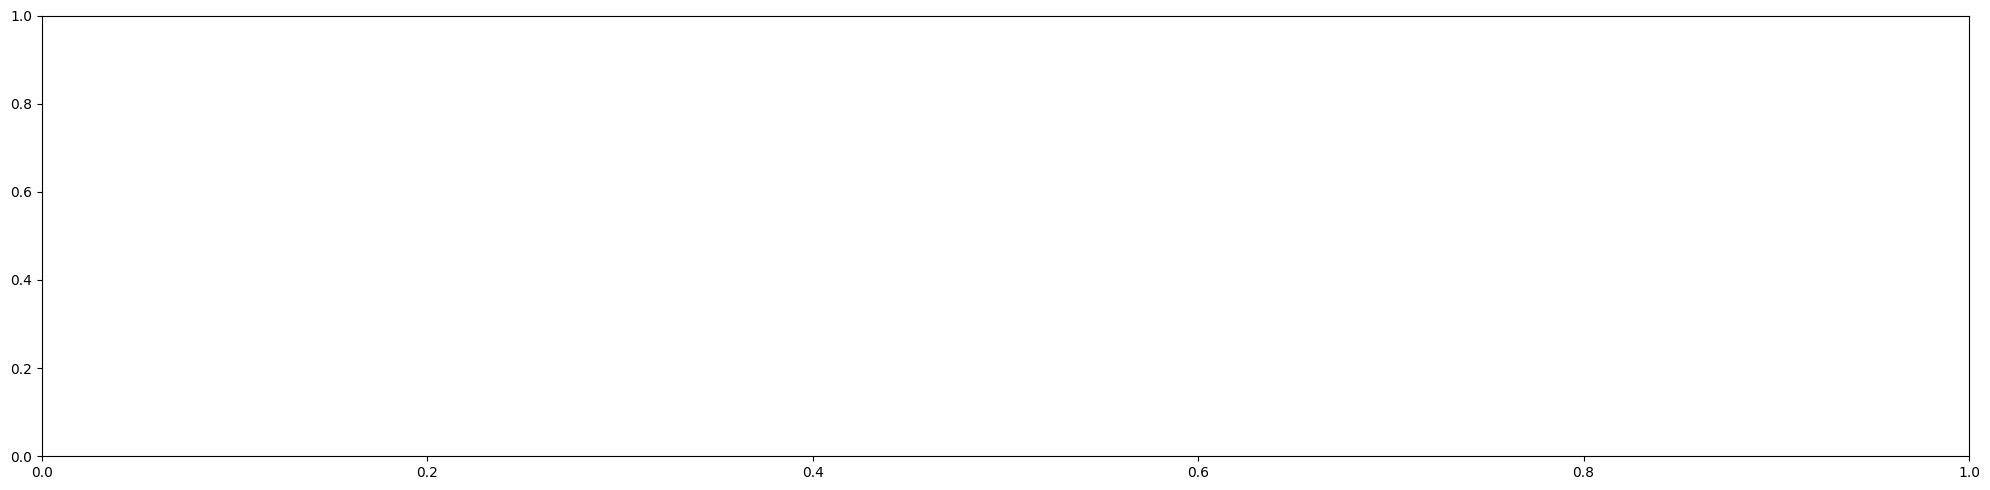

In [97]:
#Plotting all trees on same plot, diff fields on diff plots
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as color_maps
import numpy as np
from sklearn.metrics import r2_score

# fields = [('vol_over_ssa', 'vol_over_sps'), ('vol_over_sha', 'vol_over_ssa'), ('vol_over_ssa', 'vol_over_sha')] #, 'vol_over_dbh', 'vol_over_oza', 'vol_over_ota']
# fields =[('case_name','case_name')]
# fields = [('stem_psa','Projected Stem Flow Area'),('dp_95_prct',f'95%ile Drip Point Area'),('dp_avg_pa','Average Drip Point Area')]

angles = [ 2.04,1.96,1.86, 1.8,1.72,1.66, 1.64, 1.58, 1.5, 1.42, 1.34,
           1.26, 1.18, 1.1, 1.02, 0.96, 0.88,
         0.8, 0.72, 0.64, 0.56, 0.48, 0.4, 0.32, 0.24, 0.16,
           0.08, 0, -0.08, -0.16, -0.24, -0.32, -0.4, -0.48,
           -0.56, -0.64, -0.72, -0.8, -0.88, -0.96, -1.02,
           -1.1, -1.18, -1.26, -1.34, -1.42, -1.5, -1.58
           ,-1.66,-1.64,-1.72,-1.8,-1.88,-1.96,-2.04]

def plot_correlation(df, 
                        fields:list[tuple], 
                            tree_codes: list = ['32-06','27-05'], 
                            chart_range = [-2,2]):
    if tree_codes != []:
        new_file_names = set([file for file in df['file_name'] if any([code in file for code in tree_codes])])
    else: 
        new_file_names = set([file for file in df['file_name']])
        # For each group (file name), plo a line graph of case name vs vol_over_sps
    print(set([file for file in df['file_name']]))
    plotted = []
    for idx, field_tup in enumerate(fields):
        field, title_field = field_tup
        fig, ax = plt.subplots(figsize=(20, 5))
        # Replace 'your_file_name' with the actual file name you want to filter by
        conditionals = (df['case_name']<-1) | (df['case_name']>1) | (df['stem_psa'] < df['total_psa'] )
        
        clean_filtered_df = df.loc[df['stem_psa'] < df['total_psa']  ]
        upper_filtered_df = clean_filtered_df.loc[clean_filtered_df['case_name'] <=np.max(chart_range)]
        below_filtered_df =  upper_filtered_df.loc[upper_filtered_df['case_name'] >=np.min(chart_range)]
        # filtered_df = below_filtered_df.loc[below_filtered_df['case_name'].isin(angles)]
        filtered_df = below_filtered_df
        
        colors = iter(color_maps.rainbow(np.linspace(0, 1, len(new_file_names))))
        for idy,file_name in enumerate(new_file_names):
            name_filtered_df = filtered_df.loc[df['file_name'] == file_name ]

            field_max = np.max(name_filtered_df[field].values)
            # print(f'color {color_map(idy)} ')
            color = next(colors)
            print(f'fields {field_tup}, file_name {file_name}, color {color}')
            plot = ax
            plot.set_title(f"{title_field}- {file_name}")
            plot.set_xlabel("Cutoff Angle")
            plot.set_ylabel(f"{field} (m^2)")
            plot.color_bar()
            y = name_filtered_df[field].values/field_max

            # plot.scatter(x, y, color = color)
            plot.plot(x, y, color = color)
            plotted.append((file_name, x))
            plot.axvline(0.-0.16666)
        plt.show()

fields = [('stem_psa','Projected Stem Flow Area'),
          ('stem_hull_boundary','Stemflow Shed Boundary') ]
        #   ('stem_hull_area','Stemflow Shed Area')]

# plot_correlation(all_tree_stats,fields)
coeffs = plot_correlation(w_flow_stats,fields,tree_codes=[])

{'Secrest29-25_000000', 'Secrest11-27_000000', 'Secrest32-03_000000', 'Secrest10-02_000000', 'Secrest16-3TI-CO_000000', 'Secrest32-14_000000', 'Secrest28-31_000000', 'Secrest23-23_000000', 'Secrest08-24c_000000', 'Secrest10-08_000000', 'Secrest32-06_000000', 'Secrest32-01_000000', 'Secrest16-14LI-ST_000000', 'Secrest24-07_000000', 'Secrest07-32_000000', 'Secrest02-30_000000', 'Secrest27-05_000000', 'Secrest29-20_000000', 'Secrest24-03_000000', 'Secrest03-12_000000', 'Secrest31-05_000000', 'Secrest14-09_000000', 'Secrest18-13_000000', 'Secrest02-26_000000', 'Secrest26-03_000000'}
fields ('stem_psa', 'Projected Stem Flow Area', '(m^2)', 'StemFlow'), file_name Secrest27-05_000000
fields ('stem_hull_area', 'Stem Flow Shed Area', '(m^2)', 'StemFlow'), file_name Secrest27-05_000000
fields ('stem_hull_boundary', 'Projected Stem Flow Boundary', '(m)', 'StemFlow'), file_name Secrest27-05_000000
fields ('dp_pa', 'Total Drip Point Area (>=98%)', '(m^2)', 'DripPoints'), file_name Secrest27-05_0000

/tmp/ipykernel_9169/2785317353.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


fields ('dn_avg_pa', 'Average Drip Node Area', '(m^2)', 'DripPoints'), file_name Secrest32-06_000000
fields ('dn_avg_sa', 'Average Drip Node Surface Area', '(m^2)', 'DripPoints'), file_name Secrest32-06_000000
fields ('dp_sum_sa_to_vol', 'Drip Point Sum SA/Vol', '(m^-1)', 'SaOverVol'), file_name Secrest32-06_000000
fields ('dp_agg_sa_to_vol', 'Drip Point Aggregate SA/Vol', '(m^-1)', 'SaOverVol'), file_name Secrest32-06_000000
fields ('dp_avg_sa_to_vol', 'Drip Point Average SA/Vol', '(m^-1)', 'SaOverVol'), file_name Secrest32-06_000000
fields ('stem_over_else', 'Stem/Drip Projected Area', '(ratio)', 'SaOverVol'), file_name Secrest32-06_000000
fields ('stem_agg_sa_to_vol', 'Stem Flow Aggregate SA/Vol', '(m^-1)', 'SaOverVol'), file_name Secrest32-06_000000
fields ('stem_avg_sa_vol', 'Stem Flow Average SA/Vol', '(m^-1)', 'SaOverVol'), file_name Secrest32-06_000000
[('Secrest27-05_000000', [-72.19268218648372, -67.60901982543714, -63.02535746439056, -58.44169510334397, -55.00394833255903, -

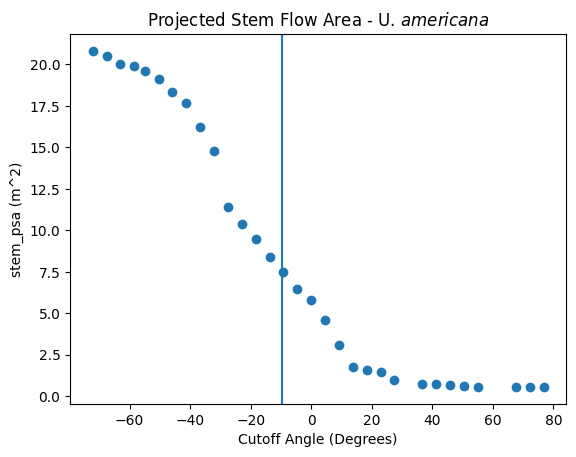

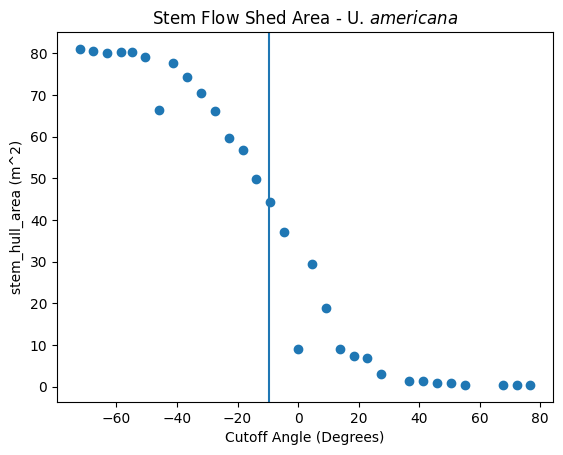

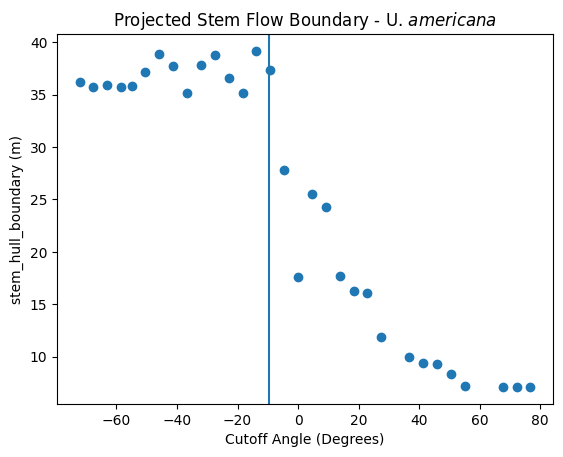

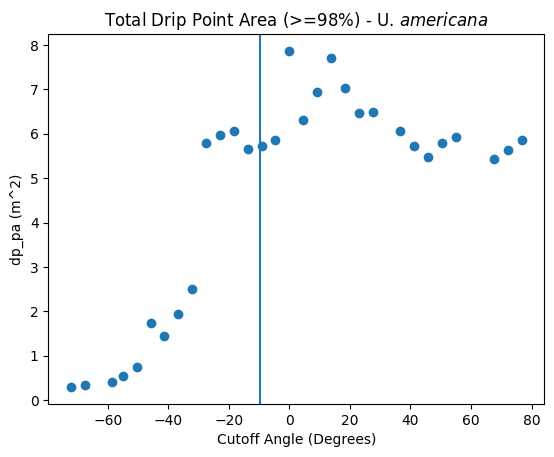

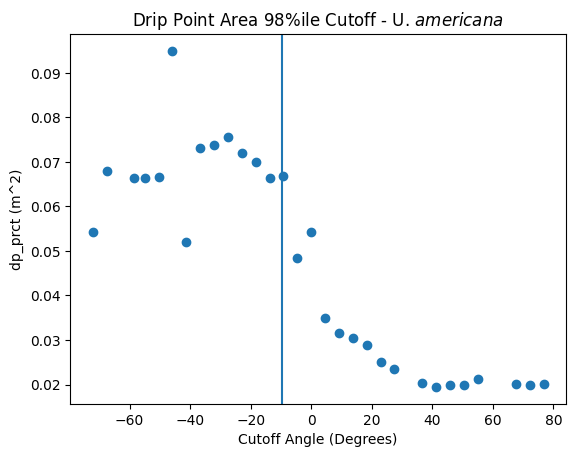

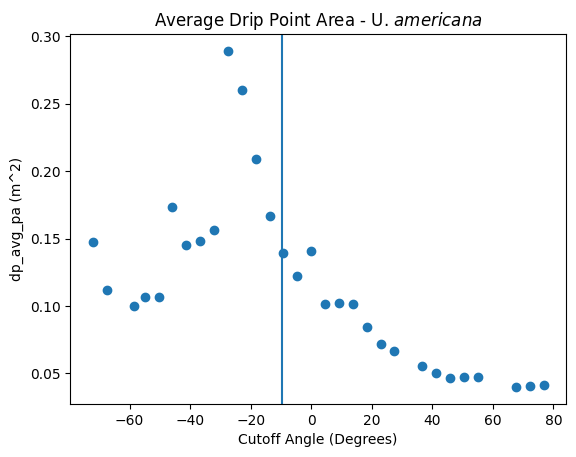

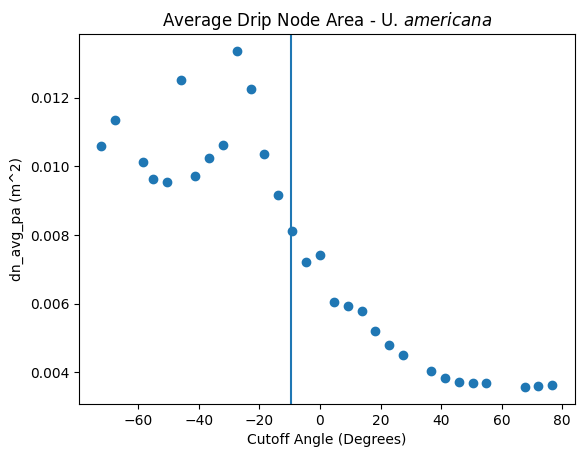

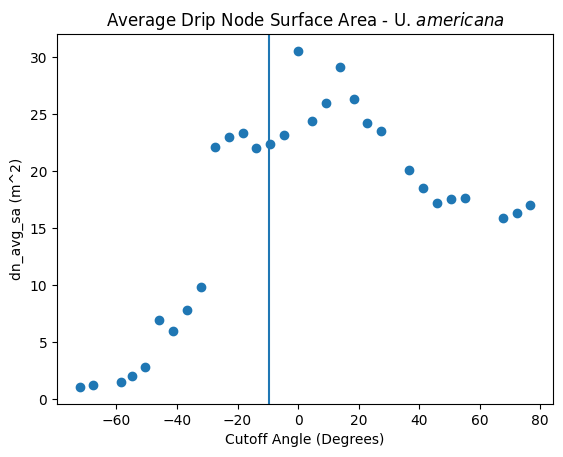

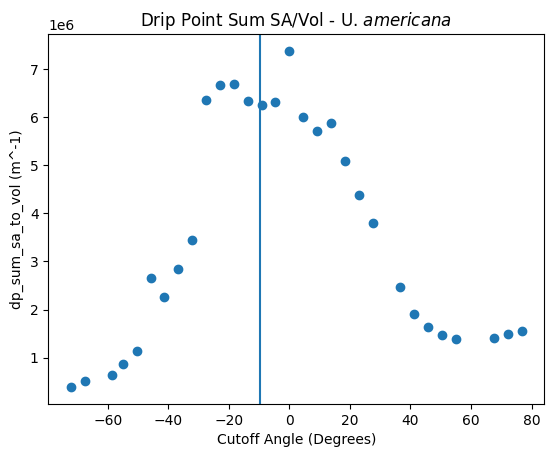

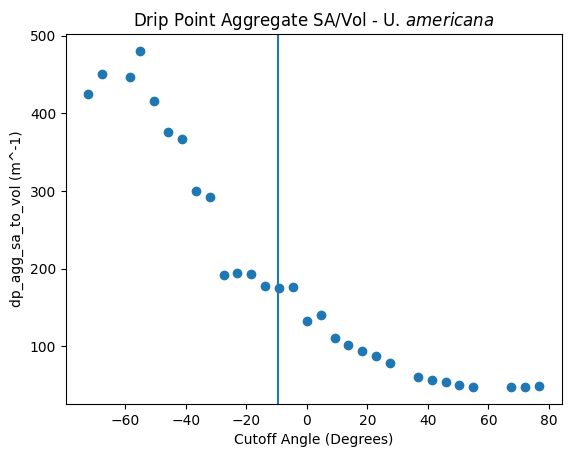

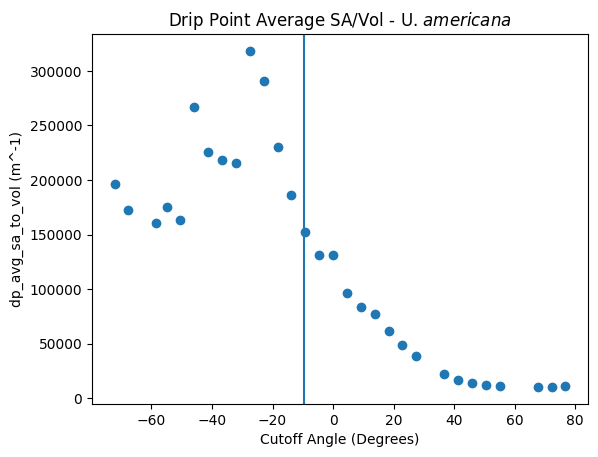

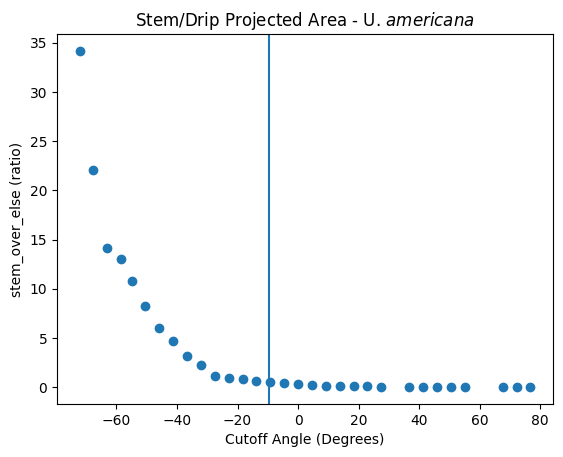

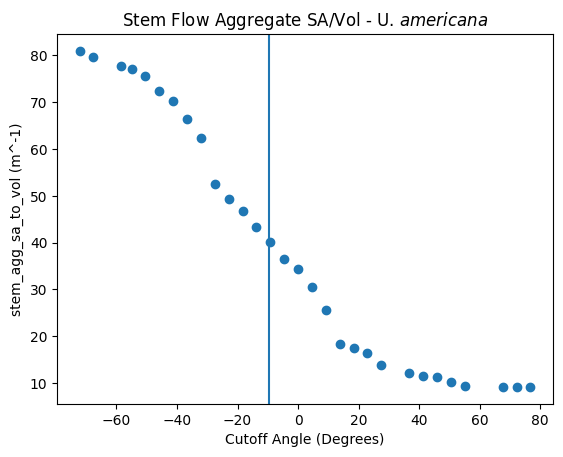

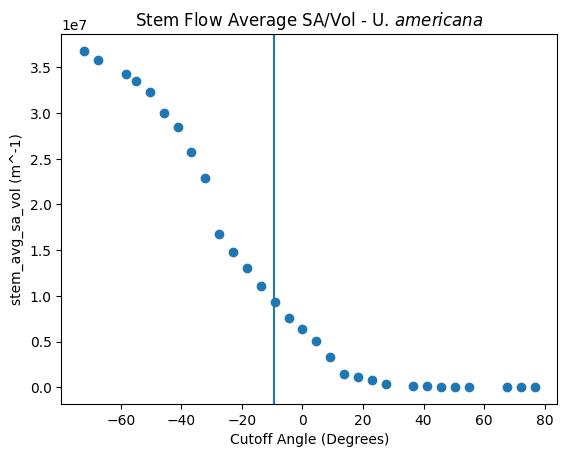

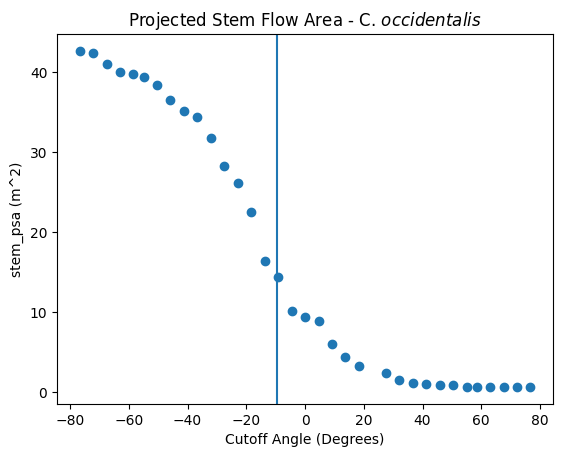

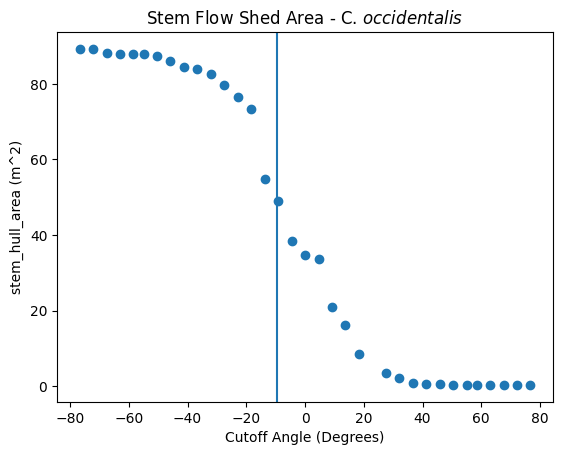

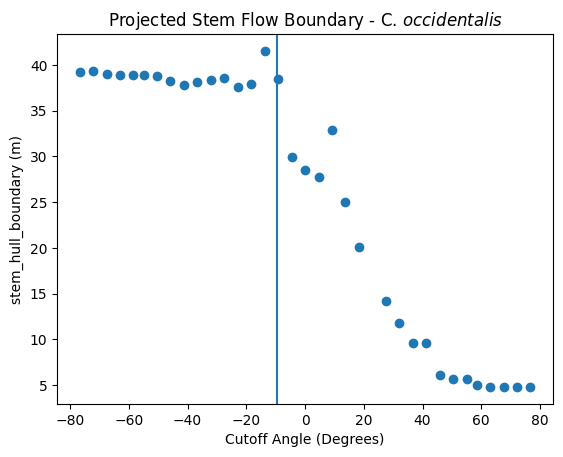

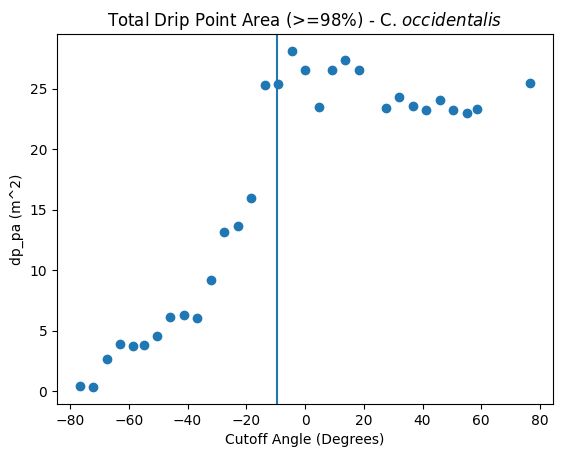

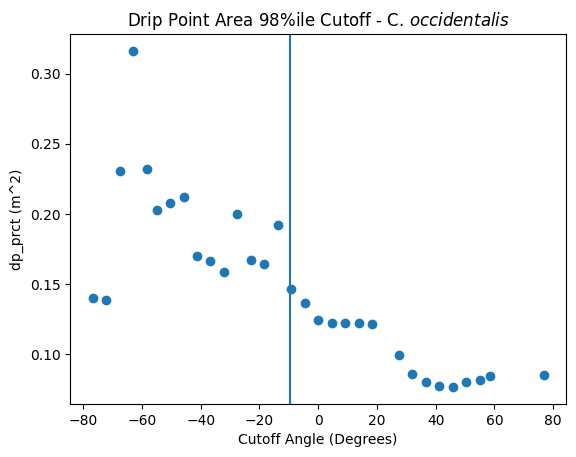

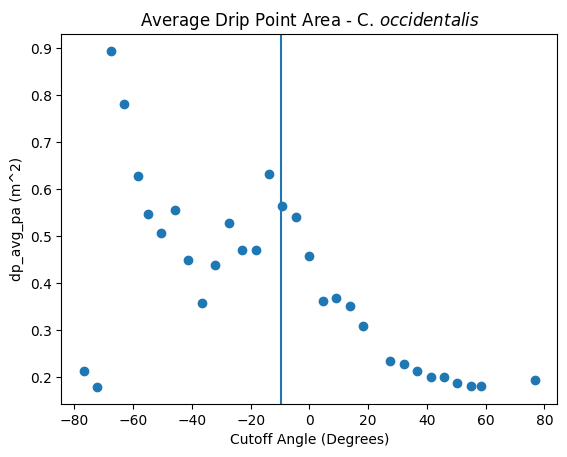

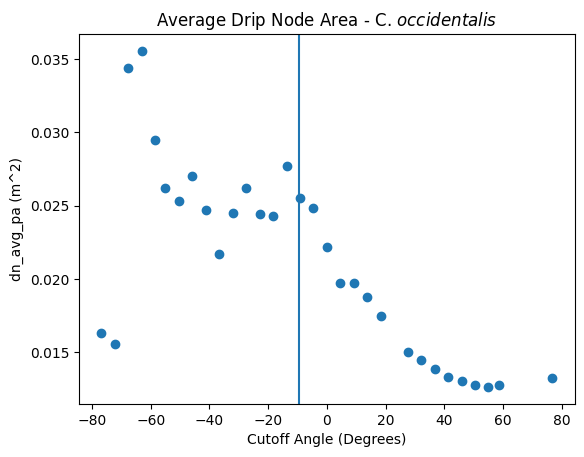

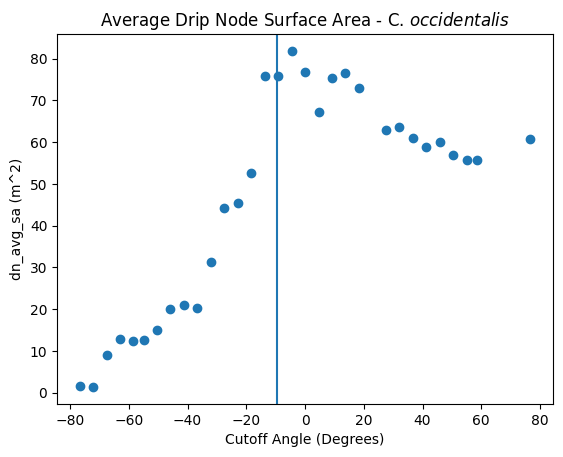

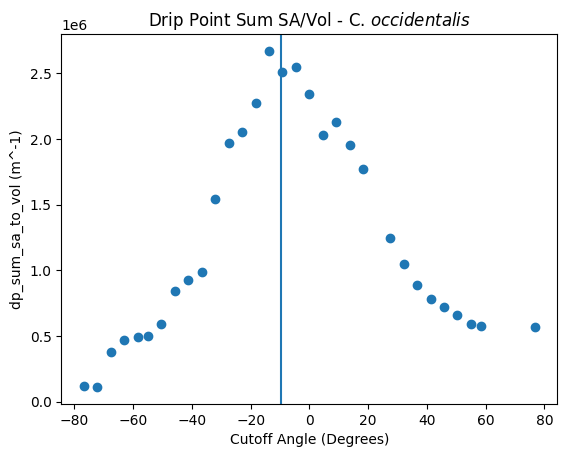

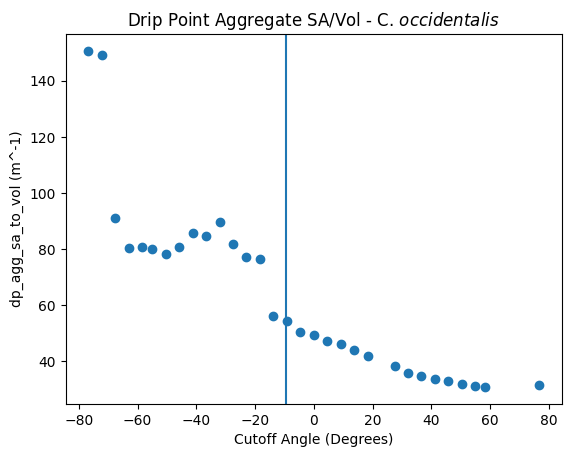

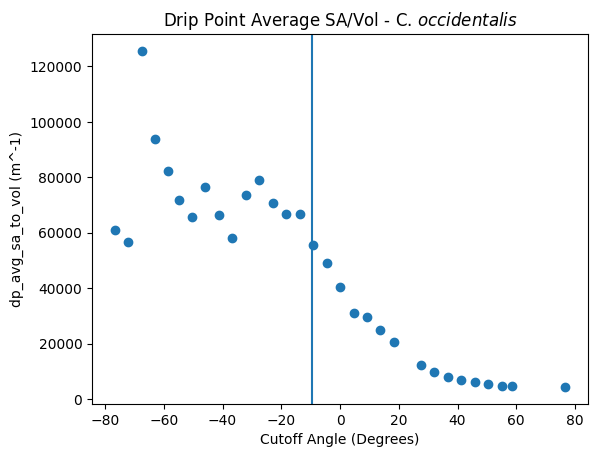

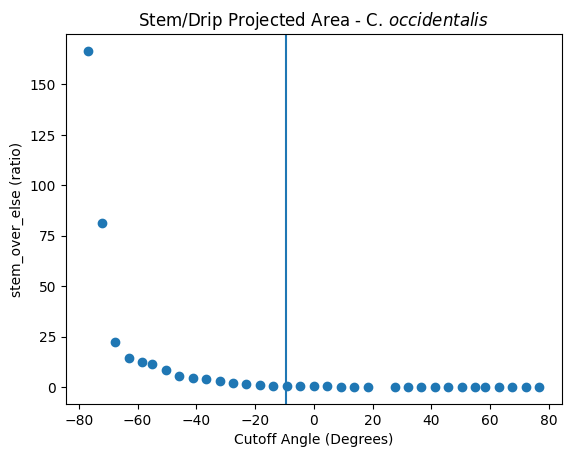

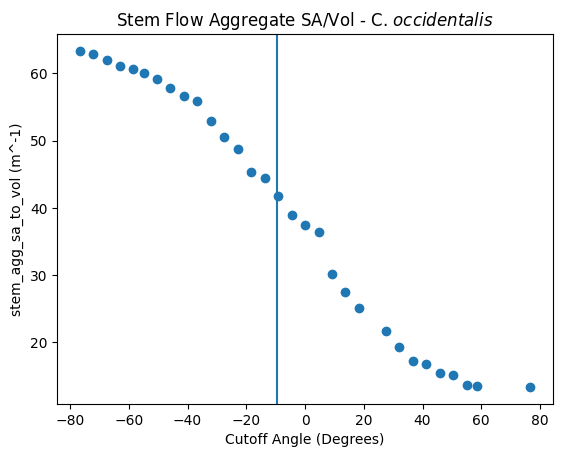

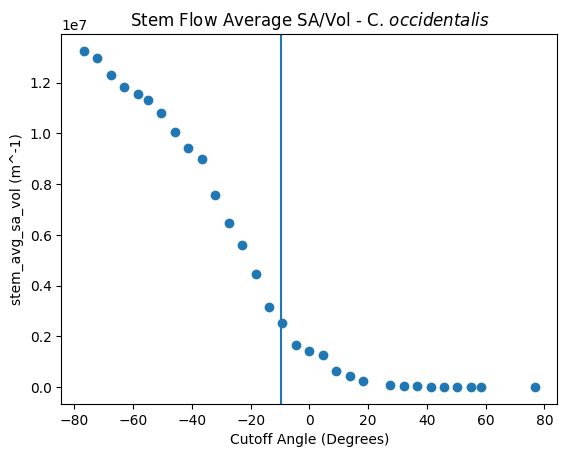

In [8]:
#Plot all fields sensitivity

fields = [
        ('stem_psa','Projected Stem Flow Area', '(m^2)','StemFlow'),
          ('stem_hull_area','Stem Flow Shed Area', '(m^2)','StemFlow'),
          ('stem_hull_boundary','Projected Stem Flow Boundary', '(m)','StemFlow'),
          ('dp_pa',f'Total Drip Point Area (>=98%)', '(m^2)','DripPoints'),
          ('dp_prct',f'Drip Point Area 98%ile Cutoff', '(m^2)','DripPoints'),
          ('dp_avg_pa','Average Drip Point Area', '(m^2)','DripPoints'),
          ('dn_avg_pa','Average Drip Node Area', '(m^2)','DripPoints'),
          ('dn_avg_sa','Average Drip Node Surface Area', '(m^2)','DripPoints'),
          ('dp_sum_sa_to_vol','Drip Point Sum SA/Vol', '(m^-1)','SaOverVol'),
          ('dp_agg_sa_to_vol','Drip Point Aggregate SA/Vol', '(m^-1)','SaOverVol'),
          ('dp_avg_sa_to_vol','Drip Point Average SA/Vol', '(m^-1)','SaOverVol'),
          ('stem_over_else','Stem/Drip Projected Area', '(ratio)','SaOverVol'),
          ('stem_agg_sa_to_vol','Stem Flow Aggregate SA/Vol', '(m^-1)','SaOverVol'),
          ('stem_avg_sa_vol','Stem Flow Average SA/Vol', '(m^-1)','SaOverVol')
        ]

# fields = [
#           ('dp_sum_sa_to_vol','Drip Point Sum SA/Vol', '(m^-1)'),
#           ('dp_agg_sa_to_vol','Drip Point Aggregate SA/Vol', '(m^-1)'),
#           ('dp_avg_sa_to_vol','Drip Point Average SA/Vol', '(m^-1)')]

angles = [ 2.04,1.96,1.86, 1.8,1.72,1.66, 1.64, 1.58, 1.5, 1.42, 1.34,
           1.26, 1.18, 1.1, 1.02, 0.96, 0.88,
         0.8, 0.72, 0.64, 0.56, 0.48, 0.4, 0.32, 0.24, 0.16,
           0.08, 0, -0.08, -0.16, -0.24, -0.32, -0.4, -0.48,
           -0.56, -0.64, -0.72, -0.8, -0.88, -0.96, -1.02,
           -1.1, -1.18, -1.26, -1.34, -1.42, -1.5, -1.58
           ,-1.66,-1.64,-1.72,-1.8,-1.88,-1.96,-2.04]
import math
def save_figs(df, 
                        fields:list[tuple], 
                            tree_codes: list = ['32-06','27-05'], 
                            chart_range = [-2,2]):
    if tree_codes != []:
        new_file_names = set([file for file in df['file_name'] if any([code in file for code in tree_codes])])
    else: 
        new_file_names = set([file for file in df['file_name']])
        # For each group (file name), plo a line graph of case name vs vol_over_sps
    print(set([file for file in df['file_name']]))
    plotted = []
    for file_name in new_file_names:
        # fig, ax = plt.subplots(1,len(fields), figsize=(20, 5))
        # Replace 'your_file_name' with the actual file name you want to filter by
        name_filtered_df = df.loc[df['file_name'] == file_name ]
        clean_filtered_df = name_filtered_df.loc[name_filtered_df['stem_psa'] < name_filtered_df['total_psa'] ]
        upper_filtered_df = clean_filtered_df.loc[clean_filtered_df['case_name'] <=np.max(chart_range)]
        below_filtered_df =  upper_filtered_df.loc[upper_filtered_df['case_name'] >=np.min(chart_range)]
        filtered_df = below_filtered_df.loc[below_filtered_df['case_name'].isin(angles)]
        # filtered_df = below_filtered_df
        for idx, field_tup in enumerate(fields):
            fig, ax = plt.subplots()
            print(f'fields {field_tup}, file_name {file_name}')
            field, title_field, units, folder = field_tup
            if '32-06' in file_name:
                tree = 'C. $\it{occidentalis}$'
                code = '32-05' 
            if '27-05' in file_name:
                tree = 'U. $\it{americana}$'
                code = '27-05' 
            # file_to_save = f'/code/code/canopyHydrodynamics/data/output/draw/sensitivity_{file_name}_{field}.svg'
            file_to_save = f'/media/penguaman/Healthy/BranchHighlight/anal/{folder}/{code}_{field}_by_angle.svg'
            
            plot = ax

            plot.set_title(f"{title_field} - {tree}")
            plot.set_xlabel("Cutoff Angle (Degrees)")
            plot.set_ylabel(f"{field} {units}")
            # plot.set_xlim([-1,1])
            x = [math.degrees(float(val)) for val in filtered_df["case_name"].values]
            print
            y = filtered_df[field].values
            # print(f'x:{x}')
            # print(f'y:{y}')
            plot.scatter(x, y)
            plotted.append((file_name, x))
            plot.axvline(math.degrees(-0.16666))
            # try:
            #     x_flitered, y_predicted, rsq, fit_type, coeff = find_fit_func(
            #         cubic, np.array(x), np.array(y)
            #     )
            #     plot.annotate(
            #         f"r^2 = {rsq}, fit = {fit_type}",
            #         (0, np.max(y) * 0.9),
            #     )
            #     plot.plot(x_flitered, y_predicted)
            #     print(f'coefficents {coeff} found for fit')
            # except Exception as e:
            #     print(f'r2 did not converge{e}')
            
            # plt.show()
            plt.savefig(file_to_save)
    print(plotted)
    plt.show()

save_figs(w_flow_stats,fields,tree_codes=['32-06','27-05'], chart_range = [-1.4,1.4])

In [ ]:
#Save Figs: secondary ys

fields = [
        ('stem_psa','Projected Stem Flow Area', '(m^2)','StemFlow'),
          ('stem_hull_area','Stem Flow Shed Area', '(m^2)','StemFlow'),
          ('stem_hull_boundary','Projected Stem Flow Boundary', '(m)','StemFlow'),
          ('dp_pa',f'Total Drip Point Area (>=98%)', '(m^2)','DripPoints'),
          ('dp_prct',f'Drip Point Area 98%ile Cutoff', '(m^2)','DripPoints'),
          ('dp_avg_pa','Average Drip Point v.  Area', '(m^2)','DripPoints'),
          ('dn_avg_sa','Average Drip Node Surface Area', '(m^2)','DripPoints'),
          ('dp_sum_sa_to_vol','Drip Point Sum SA/Vol', '(m^-1)','SaOverVol'),
          ('dp_agg_sa_to_vol','Drip Point Aggregate SA/Vol', '(m^-1)','SaOverVol'),
          ('dp_avg_sa_to_vol','Drip Point Average SA/Vol', '(m^-1)','SaOverVol'),
          ('stem_over_else','Stem/Drip Projected Area', '(ratio)','SaOverVol'),
          ('stem_agg_sa_to_vol','Stem Flow Aggregate SA/Vol', '(m^-1)','SaOverVol'),
          ('stem_avg_sa_vol','Stem Flow Average SA/Vol', '(m^-1)','SaOverVol')
        ]

# fields = [
#           ('dp_sum_sa_to_vol','Drip Point Sum SA/Vol', '(m^-1)'),
#           ('dp_agg_sa_to_vol','Drip Point Aggregate SA/Vol', '(m^-1)'),
#           ('dp_avg_sa_to_vol','Drip Point Average SA/Vol', '(m^-1)')]

angles = [ 2.04,1.96,1.86, 1.8,1.72,1.66, 1.64, 1.58, 1.5, 1.42, 1.34,
           1.26, 1.18, 1.1, 1.02, 0.96, 0.88,
         0.8, 0.72, 0.64, 0.56, 0.48, 0.4, 0.32, 0.24, 0.16,
           0.08, 0, -0.08, -0.16, -0.24, -0.32, -0.4, -0.48,
           -0.56, -0.64, -0.72, -0.8, -0.88, -0.96, -1.02,
           -1.1, -1.18, -1.26, -1.34, -1.42, -1.5, -1.58
           ,-1.66,-1.64,-1.72,-1.8,-1.88,-1.96,-2.04]
import math
def save_figs(df, 
                        fields:list[tuple], 
                            tree_codes: list = ['32-06','27-05'], 
                            chart_range = [-2,2]):
    if tree_codes != []:
        new_file_names = set([file for file in df['file_name'] if any([code in file for code in tree_codes])])
    else: 
        new_file_names = set([file for file in df['file_name']])
        # For each group (file name), plo a line graph of case name vs vol_over_sps
    print(set([file for file in df['file_name']]))
    plotted = []
    for file_name in new_file_names:
        # fig, ax = plt.subplots(1,len(fields), figsize=(20, 5))
        # Replace 'your_file_name' with the actual file name you want to filter by
        name_filtered_df = df.loc[df['file_name'] == file_name ]
        clean_filtered_df = name_filtered_df.loc[name_filtered_df['stem_psa'] < name_filtered_df['total_psa'] ]
        upper_filtered_df = clean_filtered_df.loc[clean_filtered_df['case_name'] <=np.max(chart_range)]
        below_filtered_df =  upper_filtered_df.loc[upper_filtered_df['case_name'] >=np.min(chart_range)]
        filtered_df = below_filtered_df.loc[below_filtered_df['case_name'].isin(angles)]
        # filtered_df = below_filtered_df
        for idx, field_tup in enumerate(fields):
            fig, ax = plt.subplots()
            print(f'fields {field_tup}, file_name {file_name}')
            field, field2, title_field, units, folder = field_tup
            if '32-06' in file_name:
                tree = 'C. $\it{occidentalis}$'
                code = '32-05' 
            if '27-05' in file_name:
                tree = 'U. $\it{americana}$'
                code = '27-05' 
            # file_to_save = f'/code/code/canopyHydrodynamics/data/output/draw/sensitivity_{file_name}_{field}.svg'
            file_to_save = f'/media/penguaman/Healthy/BranchHighlight/anal/{folder}/{code}_{field}_by_angle.svg'
            
            plot = ax

            plot.set_title(f"{title_field} - {tree}")
            plot.set_xlabel("Cutoff Angle (Degrees)")
            plot.set_ylabel(f"{field} {units}")
            # plot.set_xlim([-1,1])
            x = [math.degrees(float(val)) for val in filtered_df["case_name"].values]
            print
            y = filtered_df[field].values
            y2 = filtered_df[field2].values
            # print(f'x:{x}')
            # print(f'y:{y}')
            plot.scatter(x, y)
            # plot.scatter(x, y2)
            ax.secondary_yaxis(y2)
            # plotted.append((file_name, x))
            plot.axvline(math.degrees(-0.16666))
            # try:
            #     x_flitered, y_predicted, rsq, fit_type, coeff = find_fit_func(
            #         cubic, np.array(x), np.array(y)
            #     )
            #     plot.annotate(
            #         f"r^2 = {rsq}, fit = {fit_type}",
            #         (0, np.max(y) * 0.9),
            #     )
            #     plot.plot(x_flitered, y_predicted)
            #     print(f'coefficents {coeff} found for fit')
            # except Exception as e:
            #     print(f'r2 did not converge{e}')
            
            # plt.show()
            plt.savefig(file_to_save)
    print(plotted)
    plt.show()

save_figs(w_flow_stats,fields,tree_codes=['32-06','27-05'], chart_range = [-1.4,1.4])

x:[-1.2, -1.18, -1.1, -1.02, -1.0, -0.96, -0.95, -0.9, -0.88, -0.86666, -0.82, -0.8, -0.76666, -0.74, -0.72, -0.7, -0.66666, -0.66, -0.64, -0.58, -0.5666, -0.56, -0.48, -0.46, -0.44, -0.42, -0.4, -0.38, -0.36, -0.34, -0.33333, -0.32, -0.3, -0.28, -0.26, -0.24, -0.22, -0.18, -0.16666, -0.16, -0.14, -0.12, -0.1, -0.08, -0.06, 0.0, 0.04, 0.08, 0.1, 0.16, 0.1666, 0.2, 0.24, 0.26666, 0.32, 0.36666, 0.38, 0.4, 0.42, 0.44, 0.46, 0.46666, 0.48, 0.5, 0.56666, 0.64, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.92, 0.96, 1.18, 1.2]
y:[0.33475857 0.33475857        nan 0.3999912  0.45213024 0.53204683
 0.53204683 0.5975166  0.74638508 1.00324885 1.33351836 1.73506398
 1.77423479 1.51217632 1.45112249 1.76040689 1.93255566 1.61794788
 1.93030954 2.27913677 2.63092691 2.50029865 5.78385733 5.7055599
 5.75428407 6.04056922 5.97909778 6.08112979 6.08623999 5.92707816
 5.99750427 6.05296685 5.89641548 5.74901459 5.67448045 5.66078571
 5.66849934 5.79000773 5.7018537  5.72698102 5.98950183 5.82

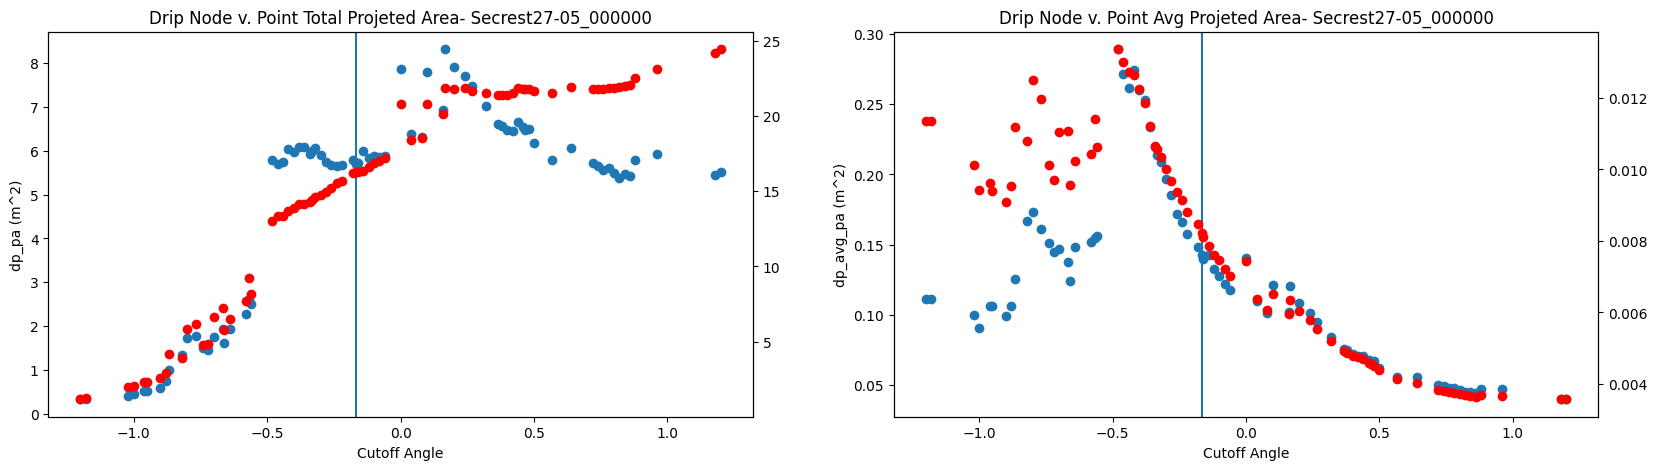

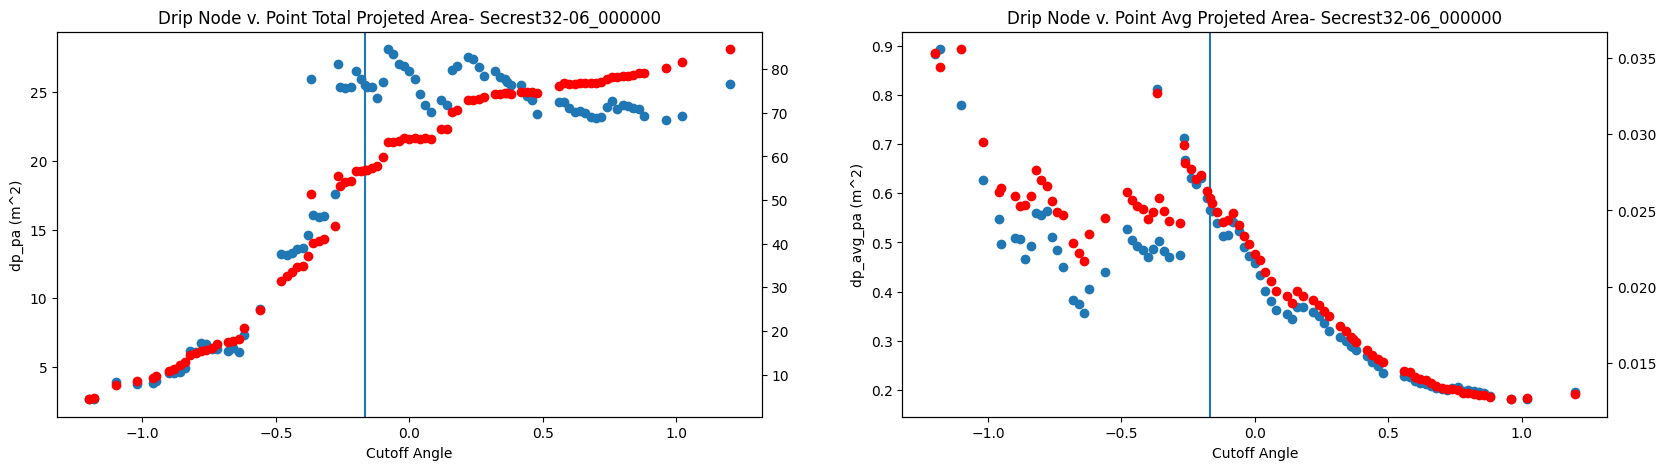

In [9]:
#plot_two_fields
# fields = [('stem_psa','Projected Stem Flow Area'),('dp_95_prct',f'95%ile Drip Point Area'),('dp_avg_pa','Average Drip Point Area')]
# print(new_file_names)
# fields = ['stem_psa']
# fields = [('stem_psa','dp_pa'),('stem_psa','dp_pa')]
fields = [
('dp_pa'    ,'dn_pa' ,'Drip Node v. Point Total Projeted Area'   ),
('dp_avg_pa','dn_avg_pa','Drip Node v. Point Avg Projeted Area')]
def plot_two_fields(df, field:tuple):
    new_file_names = set([file for file in df['file_name'] if '32-06' in file or '27-05' in file])
        # For each group (file name), plo a line graph of case name vs vol_over_sps
    for file_name in new_file_names:
        fig, ax = plt.subplots(1,len(fields), figsize=(20, 5))
        # Replace 'your_file_name' with the actual file name you want to filter by
        name_filtered_df = df.loc[df['file_name'] == file_name ]
        clean_filtered_df = name_filtered_df.loc[name_filtered_df['stem_psa'] < name_filtered_df['total_psa'] ]
        upper_filtered_df = clean_filtered_df.loc[clean_filtered_df['case_name'] <=1.2]
        filtered_df = upper_filtered_df.loc[upper_filtered_df['case_name'] >=-1.2]
        # filtered_df = filtered_df.loc[filtered_df["case_name_as_num"]<1]
        # filtered_df = filtered_df.loc[filtered_df["case_name_as_num"]>-1]
        for idx, field_tup in enumerate(fields):
            field, other_field, chart_name = field_tup
            plot = ax[idx]

            plot.set_title(f"{chart_name}- {file_name}")
            plot.set_xlabel("Cutoff Angle")
            plot.set_ylabel(f"{field} (m^2)")
            # plot.set_xlim([-1,1])
            x = [float(val) for val in filtered_df["case_name"].values]
            y = filtered_df[field].values
            print(f'x:{x}')
            print(f'y:{y}')
            plI ot.scatter(x, y)
            
            other_plot = plot.twinx() 
            other_y = filtered_df[other_field].values
            print(f'other y:{y}')
            other_plot.scatter(x, other_y, color ='red')

            plot.axvline(0.-0.16666)
            try:
                x_flitered, y_predicted, rsq, fit_type, coeff = find_fit_func(
                    cubic, np.array(x), np.array(y)
                )
                plot.annotate(
                    f"r^2 = {rsq}, fit = {fit_type}",
                    (0, np.max(y) * 0.9),
                )
                print(f'coefficents {coeff} found for fit')
                plot.plot(x_flitered, y_predicted)
            # Calculating a line of best fit (and its r-squared) to add to the above referenced chart
                # z = np.polyfit(x, y, 2)
                # p = np.poly1d(z)
                # y_predicted = p(x)
                # rsq = round(r2_score(x, y_predicted), 3)

                # ax[idx].annotate(
                #     f"r-squared = {rsq}",
                #     (0, np.max(y) * 0.75),
                # )
                # ax[idx].plot(x, y_predicted, )
            except Exception as e:
                print(f'r2 did not converge{e}')

            # ax[1].set_title(f"{field[1]} vs Cutoff Angle - {file_name}")
            # ax[1].set_xlabel("Cutoff Angle")
            # ax[1].set_ylabel(f"{field[1]} (L)")
            # x = filtered_df["case_name"]
            # y = filtered_df[field[1]]
            # ax[1].scatter(x, y)

            # # Calculating a line of best fit (and its r-squared) to add to the above referenced chart
            # z = np.polyfit(x, y, 2)
            # p = np.poly1d(z)
            # y_predicted = p(x)
            # rsq = round(r2_score(y, y_predicted), 3)

            # ax[1].annotate(
            #     f"r-squared = {rsq}",
            #     (0, np.max(y) * 0.75),
            # )
            # ax[1].plot(x, y_predicted)
            
        # plt.show()

# plot_correlation(all_tree_stats,fields)
plot_two_fields(w_flow_stats,fields)

In [ ]:
##Various plot func calls 

#Drip Flow/Point Areas
fields = [('dp_pa_95','Drip Flow Projected Area'),('dp_95_prct',f'95%ile Drip Point Area'),('dp_avg_pa_95','Average Drip Point Area')]
            
        # plt.show()

# plot_correlation(all_tree_stats,fields)
plot_correlation(w_flow_stats,fields,tree_codes=['32-06','27-05'])
# ,'07-32',
# Drip point stats
drip_stats[0].keys()
fields =  [ 
           ('dp_avg_pa','Drip Point Average Area'), 
           ('drip_avg_num_cyls','Drip Flow Avg Length'), 
            ('dp_95_prct',f'Drip Point (95%ile) Area' )]
plot_correlation(w_flow_stats,fields)

#plot drip point pa; tot, avg, max
fields =  [('dp_pa'    ,'Drip Flow Projected Area'    )
           ,('dp_max_pa','Drip Point Max Project Area' )
           ,('dp_avg_pa','Drip Point Avg Project Area' )]
plot_correlation(w_flow_stats,fields)
#Stemflow/drip node
fields = [('stem_over_dn_pa','Stem Over Drip Node Area')
          ,('stem_over_dn_pa','stem_over_dn_pa')]
plot_correlation(w_flow_stats,fields, chart_range = [-1.2,1.2])

In [54]:
#scratch
list(dataframes["Mapping"]['Species'])
# rain_sorted_vol['Z. serrata']

['Z. serrata',
 'L. styraciflua',
 'A. platanoides',
 'B. papyrifera',
 'N. sylvatica',
 'G. dioicus',
 'U. americana',
 'C. japonicum',
 "U. x 'Regal'",
 'C. occidentalis',
 'A. rubrum',
 'T. cordata']

In [49]:
# Identification of saturation point (OLD TRAITS)
# How to define:
#   - By volume of rain required before consistent stem flow is seen
#       - By comparison of stem flow vol/yield of each rain event together for each tree individually
#       - Similar to the above but with time on X, stem flow volume on Y for indv rain events
#
# Viz wanted:
#   - Volume/rain depth/stemflow yield by rain amount

# tree_list = set(dataframes['Mapping']['Species'])
# print(tree_list)


import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


# if 1 == 1:
for tree_name in list(dataframes["Mapping"]['Species']):

    # tree_name = "A. rubrum"
    tree_metrics = dataframes["Mapping"].loc[[tree_name]]

    # Creating the plots we are about to populate with data
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    # Populating one plot with data from the validation data set
    title = f"Stemflow Volume (L) by Rainfall Event - {tree_name}"
    ax[0].set_title(tree_name)
    ax[0].set_xlabel("Rainfall (mm/event)")
    ax[0].set_ylabel("Flow Volume (L)")
    x = rain_sorted_vol["Rain"]
    y = rain_sorted_vol[tree_name]
    ax[0].scatter(x, y)

    # Calculating a line of best fit (and its r-squared) to add to the above referenced chart
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
    y_predicted = p(x)
    rsq = round(r2_score(y, y_predicted), 3)

    ax[0].annotate(
        f"r-squared = {rsq}",
        (0, np.max(y) * 0.75),
    )
    ax[0].plot(x, y_predicted)

    title = f"Stemflow Depth by Rainfall Event - {tree_name}"
    ax[1].set_title(tree_name)
    ax[1].set_xlabel("Rainfall (mm/event)")
    ax[1].set_ylabel("Flow Depth (mm)")
    x = rain_sorted_depth["Rain"]
    y = rain_sorted_depth[tree_name]
    ax[1].scatter(x, y)
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    y_predicted = p(x)
    rsq = round(r2_score(y, y_predicted), 3)

    ax[1].annotate(
        f"r-squared = {rsq}",
        (0, np.max(y) * 0.75),
    )
    ax[1].plot(x, y_predicted)

    title = f"Stemflow Volume Yield by Rainfall Event - {tree_name}"
    ax[2].set_title(tree_name)
    ax[2].set_xlabel("Rainfall (mm/event)")
    ax[2].set_ylabel("Flow Depth/Rainfall (%)")
    x = rain_sorted_depth["Rain"]
    y = rain_sorted_depth[tree_name] / rain_sorted_depth["Rain"]
    ax[2].scatter(x, y)
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    y_predicted = p(x)
    rsq = round(r2_score(y, y_predicted), 3)

    ax[2].annotate(
        f"r-squared = {rsq}",
        (0, np.max(y) * 0.75),
    )
    ax[2].plot(x, y_predicted)

    title = f"Stemflow Volume Yield by Rainfall Event - {tree_name}"
    ax[3].set_title(tree_name)
    ax[3].set_xlabel("Rainfall (mm/event)")
    ax[3].set_ylabel("Flow Vol/Rainfall (L/mm)")
    x = rain_sorted_vol["Rain"]
    y = rain_sorted_vol[tree_name] / rain_sorted_vol["Rain"]
    ax[3].scatter(x, y)
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    y_predicted = p(x)
    rsq = round(r2_score(y, y_predicted), 3)

    ax[3].annotate(
        f"r-squared = {rsq}",
        (0, np.max(y) * 0.75),
    )
    ax[3].plot(x, y_predicted)

    # plt.savefig(
    #     "C:/Users/wisch/Documents/GitProjects/CanopyHydrodynamics/data/output/validation/A_Rubrum_vol_by_rain.png"
    # )

    plt.show()

KeyError: "None of [Index(['Z. serrata'], dtype='object')] are in the [index]"

In [94]:
#defining our cross plots and correlation function finder
from numpy import array as arr
def gaussian(x, a, b, c):
    """
    Used for fitting data using an gaussian curve
    Functions as an input to scipy curve_fit
    """
    y = a * np.exp(-1 * b * x**2) + c
    return y


def exponential(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * np.exp(b * x) + c


def quadratic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * x * x + b * x + c


def cubic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return x * x * x + a * x * x + b * x + c

def logrithmic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """

    return a * np.log(max(0,b * x)) + c


def find_fit_func(fit_func, x: arr, y: arr, debug = False):
    alt_fit_funcs = [logrithmic, quadratic, gaussian, cubic]
    # x_flitered = x[~np.isnan(x)]
    # y_filtered = y[~np.isnan(x)]
    # x_flitered = x[x>0]
    # y_filtered = y[x>0]
    # x_flitered = x[y_filtered>.1]
    # y_filtered = y[y_filtered>.1]
    x_flitered = x
    y_filtered = y

    y_predicted, rsq, fit_func_name, coeff = try_fit_func(
        fit_func, x_flitered, y_filtered
    )

    for alt_func in alt_fit_funcs:
        if len(coeff) != 0 and rsq > 0.2:
            if debug: print(
                f"""fff returning:
                  ~np.isnan(x) {~np.isnan(x)} 
                    x {x},
                    x_flitered {x_flitered},
                    y {y},
                    y_filtered {y_filtered}, 
                    y_predicted {y_predicted}"""
            )
            return x_flitered, y_predicted, rsq, fit_func_name, coeff
        else:
            y_predicted, rsq, fit_func_name, coeff = try_fit_func(
                alt_func, x_flitered, y_filtered, debug
            )

    if len(coeff) == 0 or rsq < 0.2:
        fit_func_name = "None"
        y_predicted = y_filtered

    if debug: print(f"fff returning: x_flitered {x_flitered}, y_predicted {y_predicted}")
    return x_flitered, y_predicted, rsq, fit_func_name, coeff


def add_plot(
    x, 
    y, 
    fit_func: Callable, 
    plot, 
    title="", 
    xlabel="Rainfall (mm/event)", 
    ylabel="", 
    debug = False,
    **plt_kwargs
):
    # Creating the plots we are about to populate with data

    # Populating one plot with data from the validation data set
    title = f"{title}"
    plot.set_title(title)
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)
    plot.scatter(x, y, **plt_kwargs)
    if fit_func:
        # Calculating a line of best fit (and its r-squared) to add to the above referenced chart
        x_flitered, y_predicted, rsq, fit_type, coeff = find_fit_func(
            fit_func, arr(x), arr(y),debug
        )

        plot.annotate(
            f"r^2 = {rsq}, fit = {fit_type}",
            (0, np.max(y) * 0.9),
        )
        # plot.plot(x_flitered, y_predicted)
        return rsq, fit_type, coeff
    return None, None, None


def cross_plot(rows, cols, common_x, adj_denom=None, fit_func=quadratic, debug = False, **plt_kwargs):
    num_cols = len(cols) * 2 if adj_denom else len(cols)
    num_rows = len(rows)
    plt.rcParams["figure.autolayout"] = True

    _, ax = plt.subplots(num_rows, num_cols, figsize=(3 * num_cols, 3 * num_rows))
    fit_results = []
    for row_number, row_key in enumerate(rows):
        for col_number, col_metric in enumerate(cols):
            xlabel = common_x[0]
            ylabel = col_metric[0]
            title = f"{row_key}"

            if debug: print(f"Processing {row_key}, {ylabel}")
            if debug: print(f'col metric {col_metric}')
            y_data_raw = col_metric[1][row_key]
            y_filter = y_data_raw >0
            y_data =y_data_raw[y_filter ]
            x_data = common_x[1][y_filter ]
            filtered_args = plt_kwargs.copy()
            for arg in filtered_args:
                try:
                    filtered_args[arg] = filtered_args[arg][y_filter]
                except Exception as e:
                    print(f'arg {arg} not filtered: {e}')
            rsq, fit_type, coeff = add_plot(
                x_data,
                y_data,
                fit_func,
                ax[row_number, col_number],
                title,
                xlabel,
                ylabel,
                **filtered_args
            )
            #This portion plots the above metric/adj Denom
            fit_results.append((rsq, fit_type, coeff))  
            if adj_denom:
                ylabel = f"{col_metric[0]} / {adj_denom[0]}"
                title = f"{row_key}"
                adj_col_num = col_number + len(cols)
                if debug: print(f'col metric {col_metric}')
                rsq, fit_type, coeff = add_plot(
                    x[1],
                    col_metric[1][row_key] / adj_denom[1],
                    fit_func,
                    ax[row_number, adj_col_num],
                    title,
                    xlabel,
                    ylabel,
                    debug,
                     **plt_kwargs
                    )
                fit_results.append((rsq, fit_type, coeff))
    plt.show()


# print(rain_sorted_vol)

# print(tree_keyed_data_sets[1][1]  ['T. cordata'])
# print(tree_keyed_data_sets[1][1]['T. cordata'][len(tree_keyed_data_sets[1][1]['T. cordata'])])
# fit_result = cross_plot(
#     rows=keys,
#     cols=tree_keyed_data_sets,
#     common_x=x,
#     adj_denom=adjustment_denominator,
#     fit_func=exponential,
# )

# print(fit_result)
# plt.savefig('C:/Users/wisch/Documents/GitProjects/CanopyHydrodynamics/data/output/validation/munge_test_sort_nan_gr_3_mm_no_r_filter.png')


In [76]:
# print(tree_keyed_data_sets[0][1])
# rain_sorted_vol["Rain"]
y_data_raw =tree_keyed_data_sets[0][1]['Z. serrata']
y_data = y_data_raw[y_data_raw >0 ]
y_data

Date
2022-10-15    0.39
2020-09-13    0.04
2022-10-19    0.01
2020-08-26    0.01
2022-11-02    0.16
2020-08-01    0.12
2022-07-14    0.63
2022-07-07    0.08
2020-08-27    0.16
2020-08-16    0.26
2020-08-04    0.65
2020-07-27    0.27
2020-09-28    1.00
2022-09-06    0.21
2020-08-03    0.74
2022-08-23    0.13
2020-08-28    1.93
2022-07-19    0.25
2020-09-07    2.38
2022-08-02    0.30
2022-10-09    1.81
2022-08-11    0.69
Name: Z. serrata, dtype: float64

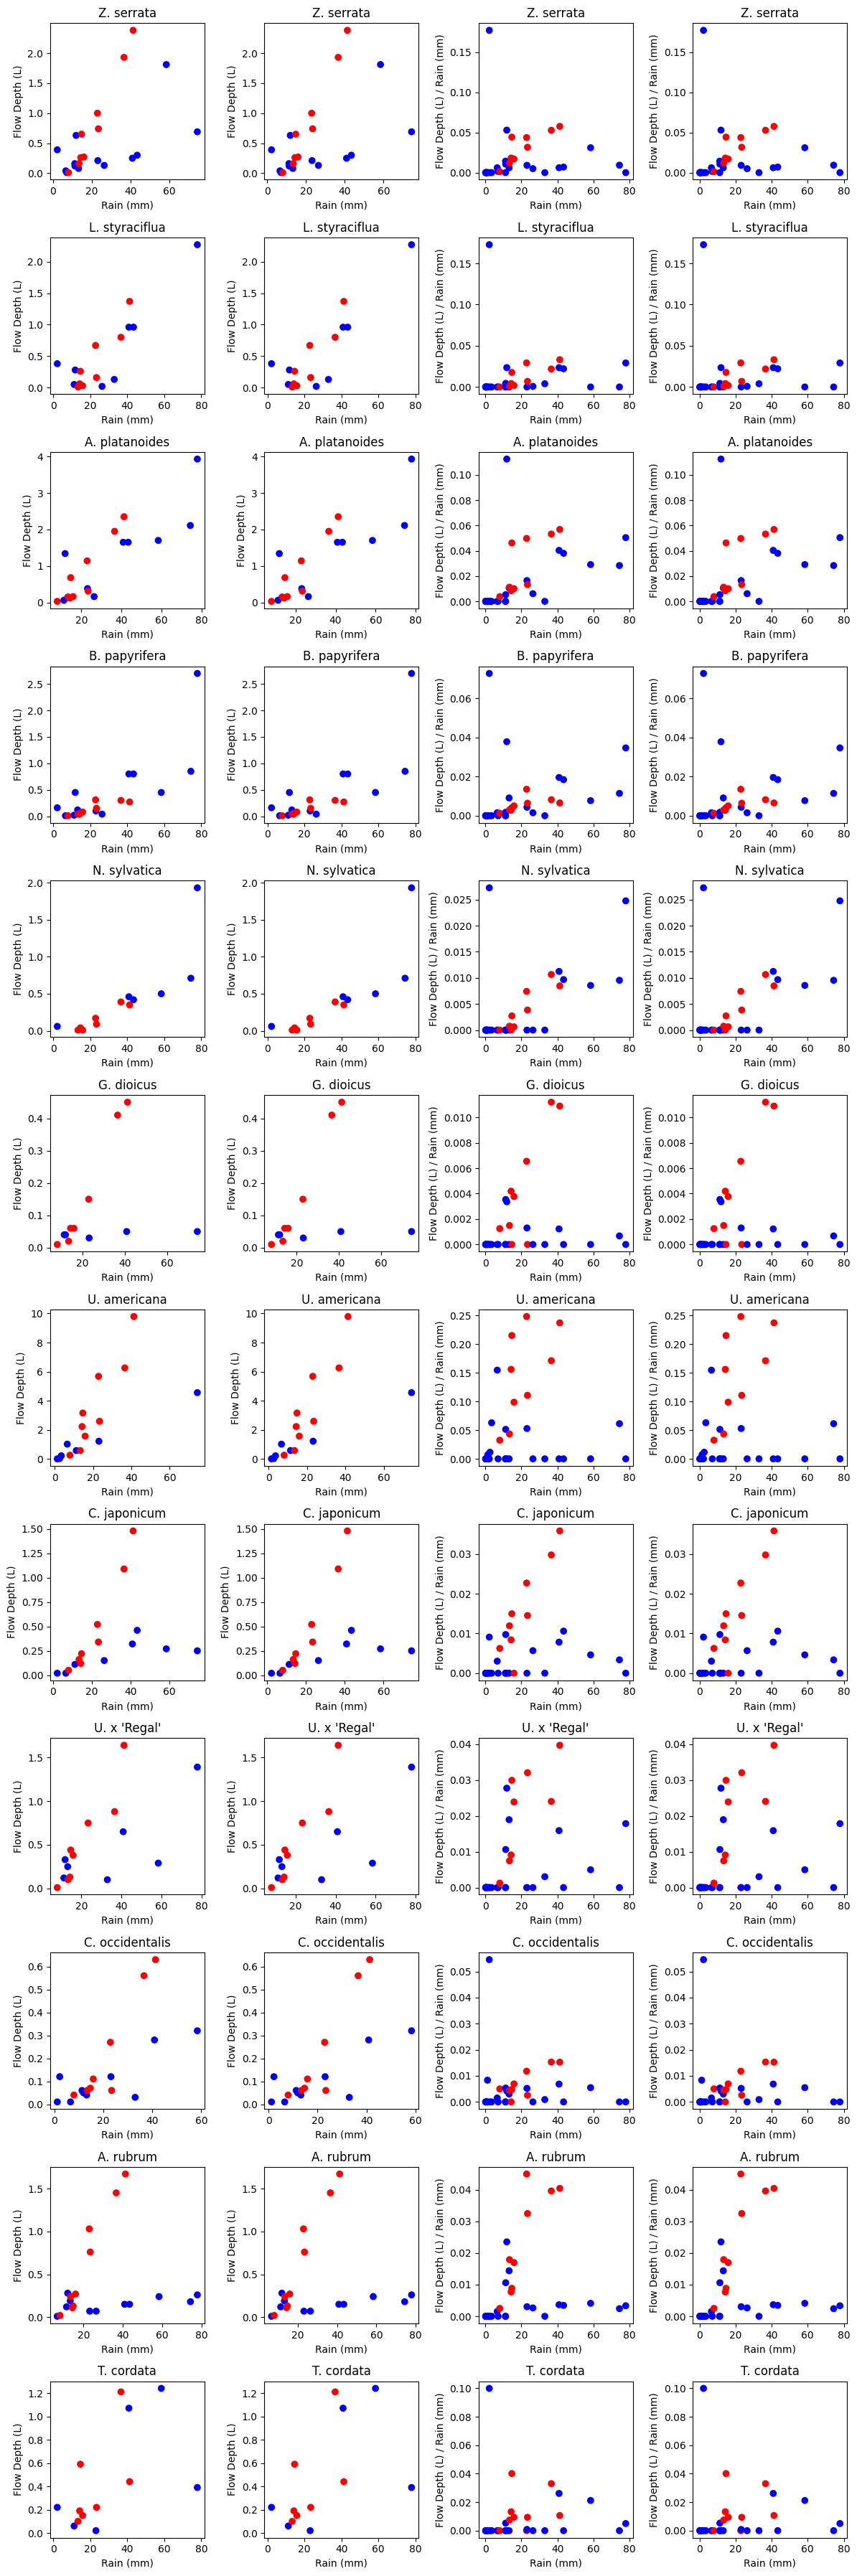

In [100]:
#cross plot validation data

x = ("Rain (mm)", rain_sorted_depth["Rain"])
# should be the same for each metric

tree_keyed_data_sets = [
    ("Flow Depth (mm)", rain_sorted_depth),
    ("Flow Volume (L)", rain_sorted_vol),
]
# ("Flow Depth (mm)",rain_sorted_depth),]
labels = []
adjustment_denominator = x
# tree list
keys = dataframes["Mapping"].index
df = rain_sorted_depth

df["intensity_color"] = df['Intensity'].map(lambda x: "r" if x>df['Intensity'].describe()['50%'] else "b")
colors = df['intensity_color']

# print(volume_w_intensity.columns)
# print(rain_sorted_depth.columns)
# #cross plotting validation data
fit_result = cross_plot(
    rows=keys,
    cols=tree_keyed_data_sets,
    common_x=x,
    adj_denom=adjustment_denominator,
    # fit_func=exponential,
    fit_func=None,
    c = colors
)

#U. americana

#G. Dioicus - 1-2 0 flow high intenisty 
#Z.serrata
#A. Platanoides (to a slight extent)

In [ ]:
#old trait code

# rain = rain_sorted_vol['Rain']
# x=('Rain (mm)',rain_sorted_vol['Rain'])
# tree_keyed_data_sets = [("Flow Volume (L)",rain_sorted_vol),]
#                         # ("Flow Depth (mm)",rain_sorted_depth),]
# labels = []
# tree_list = dataframes['Mapping'].index

# print(dataframes['Mapping'].loc[['Z. serrata']])

# num = pd.DataFrame({'circle': [4, 4, 4],'triangle': [6, 6, 6],'rectangle': [5, 5, 5]},
#                      index=['a', 'b', 'c'])
# denom = [2,3,5]

# print(num)
# print(num.div(denom))

# print(rain_sorted_vol)
# print(dataframes['Mapping'])


tot_psa = dataframes["Mapping"]["total_psa"].T
stem_psa = dataframes["Mapping"]["stem_psa"].T

tot_surface_area = dataframes["Mapping"]["tot_surface_area"].T
stem_surface_area = dataframes["Mapping"]["stem_surface_area"].T

tot_hull_area = dataframes["Mapping"]["tot_hull_area"].T
stem_hull_area = dataframes["Mapping"]["stem_hull_area"].T

dbh = dataframes["Mapping"]["DBH"].T

Order_zero_angle_avg = dataframes["Mapping"]["Order_zero_angle_avg"].T
Order_two_angle_avg = dataframes["Mapping"]["Order_two_angle_avg"].T

# # print(tot_psa,stem_psa,tot_hull_area,stem_hull_area)

vol_over_tpsa = rain_sorted_vol.div(tot_psa)
vol_over_spsa = rain_sorted_vol.div(stem_psa)
vol_over_tsa = rain_sorted_vol.div(tot_surface_area)
vol_over_ssa = rain_sorted_vol.div(stem_surface_area)
vol_over_tha = rain_sorted_vol.div(tot_hull_area)
vol_over_sha = rain_sorted_vol.div(stem_hull_area)

vol_over_dbh = rain_sorted_vol.div(dbh)

vol_over_oza = rain_sorted_vol.div(Order_zero_angle_avg)
vol_over_ota = rain_sorted_vol.div(Order_two_angle_avg)

# print(tot_psa)
# print(vol_over_tpsa)
# print([col[1].max()[] for col in [('Vol/Tot. PSA' ,vol_over_tpsa),]])


print(vol_over_tpsa["A. platanoides"][vol_over_tpsa["A. platanoides"] > 0])
# (vol_over_spsa
# (vol_over_tha
# (vol_over_sha )

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

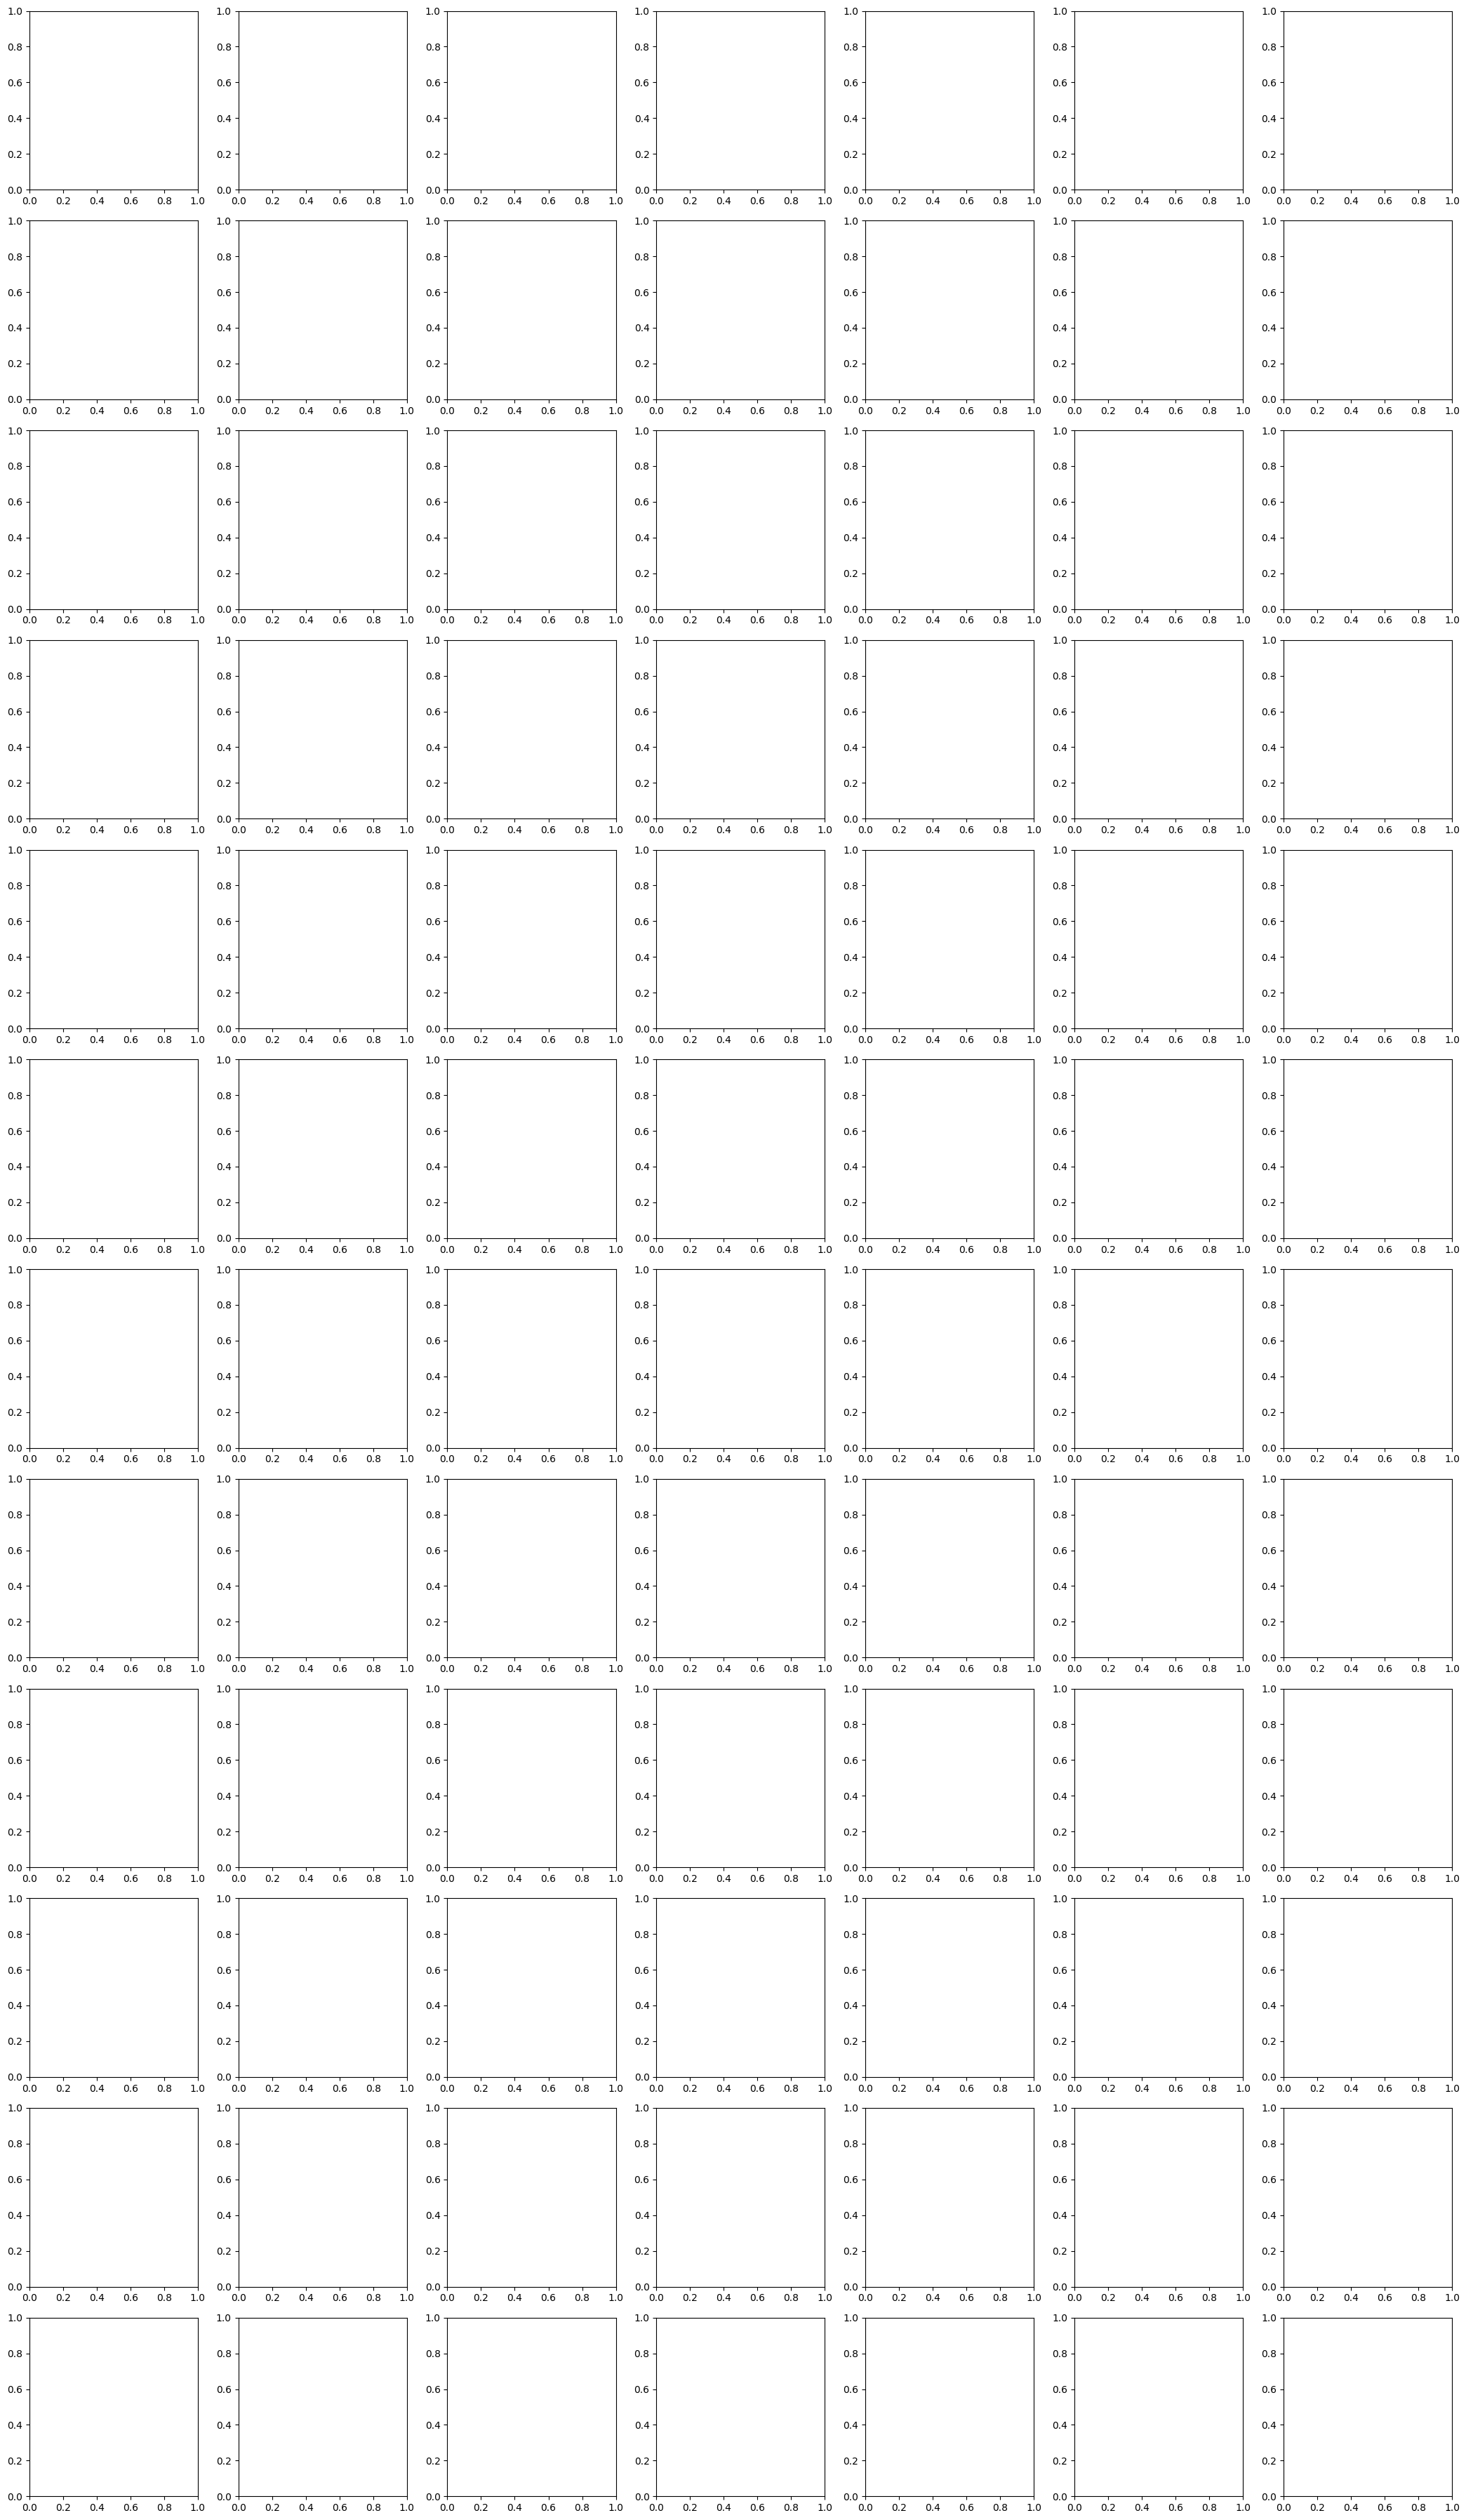

In [98]:

#cross plot validation data
hydro_met_data = rain_data['2020_Secrest_Hydromet_Data_Volu']

x = ("Rain (mm)", hydro_met_data["Rain"])
# should be the same for each metric

tree_keyed_data_sets = [
    ("Flow Depth (mm)", rain_sorted_depth),
    ("Flow Volume (L)", rain_sorted_vol),
]
# ("Flow Depth (mm)",rain_sorted_depth),]
labels = []
adjustment_denominator = x
# tree list
keys = dataframes["Mapping"].index
df = rain_sorted_depth

df["intensity_color"] = df['Intensity'].map(lambda x: "r" if x>df['Intensity'].describe()['50%'] else "b")
colors = df['intensity_color']

# print(volume_w_intensity.columns)
# print(rain_sorted_depth.columns)
# #cross plotting validation data
fit_result = cross_plot(
    rows=keys,
    cols=tree_keyed_data_sets,
    common_x=x,
    adj_denom=adjustment_denominator,
    # fit_func=exponential,
    fit_func=None,
    c = colors
)

In [109]:
#Munging hydro met data 

#getting time since start of event
import datetime
from datetime import time 
# hydro_met_data = rain_data['2020_Secrest_Hydromet_Data_Volu'].copy()
hydro_met_data['is_date'] = hydro_met_data['Date'].map(lambda x: isinstance(x, datetime.datetime))
date_group_indexes = hydro_met_data.query("is_date").groupby('Date')['TIMESTAMP']
date_group_indexes = hydro_met_data.query("is_date").groupby('Date')['TIMESTAMP']

hydro_met_data['event_start'] = date_group_indexes.transform(min)
time_start_to_curr= hydro_met_data['TIMESTAMP'] - hydro_met_data['event_start']
# hydro_met_data['sec_since_start'] = 
hydro_met_data['sec_since_start']=time_start_to_curr.apply(lambda x: x.total_seconds())

hydro_met_data['sec_since_start']
# hydro_met_data.query("is_date").groupby('Date')['TIMESTAMP'].idxmin()
# hydro_met_data.columns
# set([x for x in hydro_met_data['Date'] if isinstance(x, time)])

/tmp/ipykernel_70543/1849697039.py:14: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  hydro_met_data['event_start'] = date_group_indexes.transform(min)


0           0.0
1          60.0
2         120.0
3         180.0
4         240.0
         ...   
3948    56640.0
3949    56760.0
3950    56880.0
3951    57000.0
3952    57120.0
Name: sec_since_start, Length: 3953, dtype: float64

In [115]:
dataframes.keys()

dict_keys(['RainEventSummary', 'Hydrograph2022', 'Hydrograph2020', 'RainSummary', 'Mapping', 'TraitExtraction', 'StemFlowVolume', 'DataByArea', 'Volume', 'Depth', 'Yield', 'VolumeByArea', 'YieldByArea', 'DepthByArea'])